<a href="https://colab.research.google.com/github/adrianbarrenada/APRENDIZAJE_AUTOMATICO_23_24/blob/main/PW1_red_1_n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset Details

This dataset consists of 638 images collected by Roboflow from two aquariums in the United States: The Henry Doorly Zoo in Omaha (October 16, 2020) and the National Aquarium in Baltimore (November 14, 2020). The images were labeled for object detection by the Roboflow team (with some help from SageMaker Ground Truth). Images and annotations are released under a Creative Commons By-Attribution license. You are free to use them for any purposes personal, commercial, or academic provided you give acknowledgement of their source.

## Class Breakdown

The following classes are labeled: fish, jellyfish, penguins, sharks, puffins, stingrays, and starfish. Most images contain multiple bounding boxes.

In [1]:
!pip install opencv-python
import zipfile
import io
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from PIL import Image

# Ruta del archivo ZIP
ruta_zip = "/content/practica_1_dataset (1).zip"  # Reemplázala con la ruta real

# Abrir el ZIP sin extraerlo
with zipfile.ZipFile(ruta_zip, 'r') as archivo_zip:
    archivos_en_zip = archivo_zip.namelist()  # Lista de archivos en el ZIP

    # Buscar el archivo annotations.csv dentro de la carpeta train/
    archivo_annotations = next((f for f in archivos_en_zip if f.startswith("train/") and "annotations" in f and f.endswith(".csv")), None)

    if archivo_annotations:
        with archivo_zip.open(archivo_annotations) as archivo:
            df_annotations = pd.read_csv(archivo)  # Cargar CSV directamente desde el ZIP
    else:
        raise FileNotFoundError("No se encontró annotations.csv en la carpeta train dentro del ZIP.")

    # Obtener nombres de imágenes en train/
    imagenes_en_train = {f for f in archivos_en_zip if f.startswith("train/") and f.endswith((".jpg", ".png"))}

    # Filtrar annotations para incluir solo imágenes que existen en el ZIP
    df_train = df_annotations[df_annotations['filename'].apply(lambda x: f"train/{x}" in imagenes_en_train)].copy()

    # Función para cargar imagen desde el ZIP
    def cargar_imagen(filename):
        ruta_imagen = f"train/{filename}"
        if ruta_imagen in imagenes_en_train:
            with archivo_zip.open(ruta_imagen) as imagen_zip:
                return Image.open(io.BytesIO(imagen_zip.read()))  # Cargar imagen con PIL
        return None  # Si no existe, devolver None

    # Crear nueva columna con imágenes
    df_train['imagen'] = df_train['filename'].apply(cargar_imagen)

# Mostrar el DataFrame con imágenes
df_train


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 19.1 MB/s eta 0:00:00


filename  width  height  \
0     IMG_2541_jpeg_jpg.rf.fc997b87790e715d47ce1cc83...    768    1024   
1     IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
2     IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
3     IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
4     IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
...                                                 ...    ...     ...   
3319  IMG_8581_MOV-0_jpg.rf.655f2e11059aeb33350230db...    576    1024   
3320  IMG_8581_MOV-0_jpg.rf.655f2e11059aeb33350230db...    576    1024   
3321  IMG_8581_MOV-0_jpg.rf.655f2e11059aeb33350230db...    576    1024   
3322  IMG_8571_MOV-2_jpg.rf.6620ac28d99d209e56813944...    576    1024   
3323  IMG_8571_MOV-2_jpg.rf.6620ac28d99d209e56813944...    576    1024   

         class  xmin  ymin  xmax  ymax  \
0     starfish   302   410   534   730   
1        shark   106   442   175   640   
2         fish   638   490   678   672   
3         fish   625   107   765   187   
4         fish   818   419   830   499   
...        ...   ...   ...   ...   ...   
3319      fish   248   414   283   438   
3320      fish   314   409   333   417   
3321  stingray   122   343   352   433   
3322      fish   499   245   575   361   
3323     shark     0   493   523   670   

                                                 imagen  
0     <PIL.JpegImagePlugin.JpegImageFile image mode=...  
1     <PIL.JpegImagePlugin.JpegImageFile image mode=...  
2     <PIL.JpegImagePlugin.JpegImageFile image mode=...  
3     <PIL.JpegImagePlugin.JpegImageFile image mode=...  
4     <PIL.JpegImagePlugin.JpegImageFile image mode=...  
...                                                 ...  
3319  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
3320  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
3321  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
3322  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
3323  <PIL.JpegImagePlugin.JpegImageFile image mode=...  

[3324 rows x 9 columns]

In [2]:
df_train.head(20)

filename  width  height  \
0   IMG_2541_jpeg_jpg.rf.fc997b87790e715d47ce1cc83...    768    1024   
1   IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
2   IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
3   IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
4   IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
5   IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
6   IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
7   IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
8   IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
9   IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
10  IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
11  IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
12  IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
13  IMG_2383_jpeg_jpg.rf.fd376436d382e985e3c0e6936...    768    1024   
14  IMG_2383_jpeg_jpg.rf.fd376436d382e985e3c0e6936...    768    1024   
15  IMG_3147_jpeg_jpg.rf.fc4622004ff72e58b54663577...    768    1024   
16  IMG_3147_jpeg_jpg.rf.fc4622004ff72e58b54663577...    768    1024   
17  IMG_3147_jpeg_jpg.rf.fc4622004ff72e58b54663577...    768    1024   
18  IMG_3131_jpeg_jpg.rf.fcf0ccd8dbf187344da242e29...    768    1024   
19  IMG_3131_jpeg_jpg.rf.fcf0ccd8dbf187344da242e29...    768    1024   

       class  xmin  ymin  xmax  ymax  \
0   starfish   302   410   534   730   
1      shark   106   442   175   640   
2       fish   638   490   678   672   
3       fish   625   107   765   187   
4       fish   818   419   830   499   
5       fish   811    24   942    81   
6       fish   860   450   904   495   
7       fish   627   690   651   735   
8       fish   894   515   943   560   
9       fish   586   135   628   168   
10      fish   514   587   555   617   
11      fish   465   407   503   432   
12      fish   503   390   531   412   
13  starfish    35   504   394   844   
14  starfish   540   371   742   641   
15    puffin    91   392   571   823   
16    puffin    67   332   127   397   
17    puffin   615   117   755   187   
18    puffin   424   517   667   643   
19    puffin   458   257   563   356   

                                               imagen  
0   <PIL.JpegImagePlugin.JpegImageFile image mode=...  
1   <PIL.JpegImagePlugin.JpegImageFile image mode=...  
2   <PIL.JpegImagePlugin.JpegImageFile image mode=...  
3   <PIL.JpegImagePlugin.JpegImageFile image mode=...  
4   <PIL.JpegImagePlugin.JpegImageFile image mode=...  
5   <PIL.JpegImagePlugin.JpegImageFile image mode=...  
6   <PIL.JpegImagePlugin.JpegImageFile image mode=...  
7   <PIL.JpegImagePlugin.JpegImageFile image mode=...  
8   <PIL.JpegImagePlugin.JpegImageFile image mode=...  
9   <PIL.JpegImagePlugin.JpegImageFile image mode=...  
10  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
11  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
12  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
13  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
14  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
15  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
16  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
17  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
18  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
19  <PIL.JpegImagePlugin.JpegImageFile image mode=...

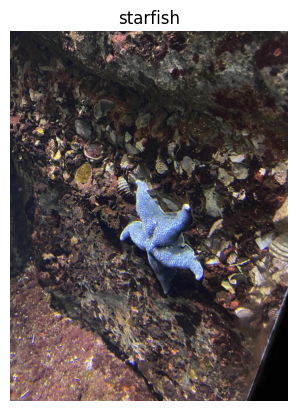

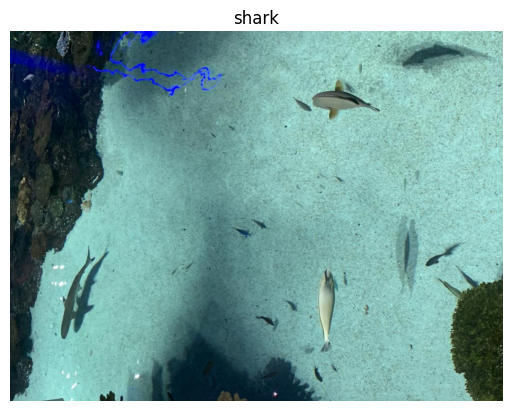

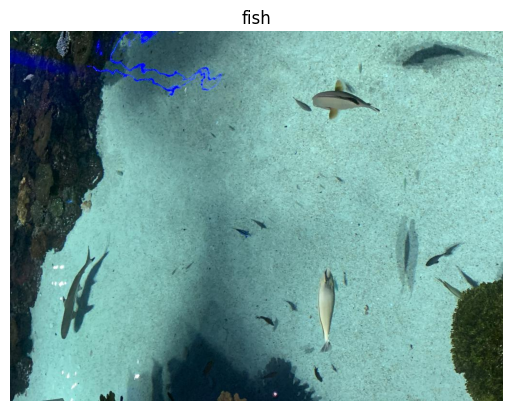

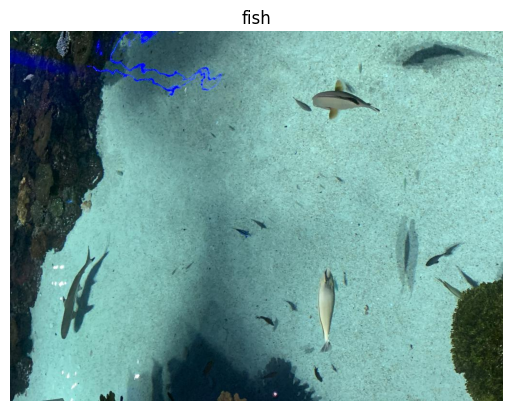

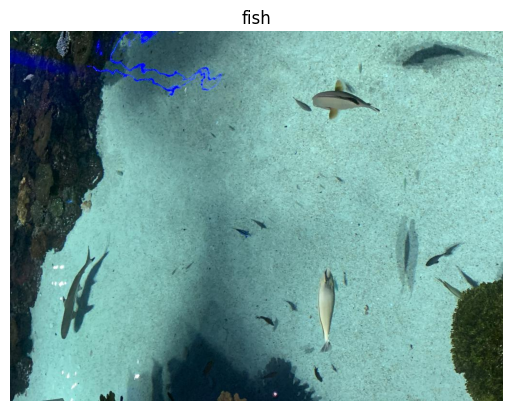

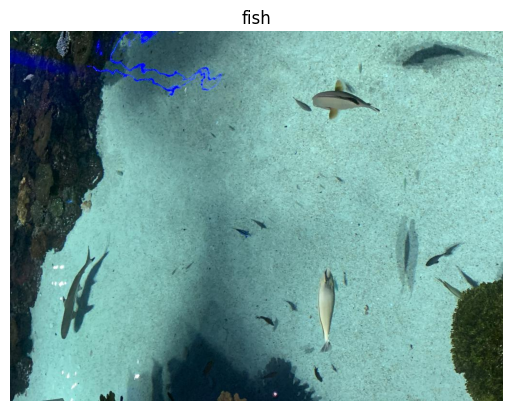

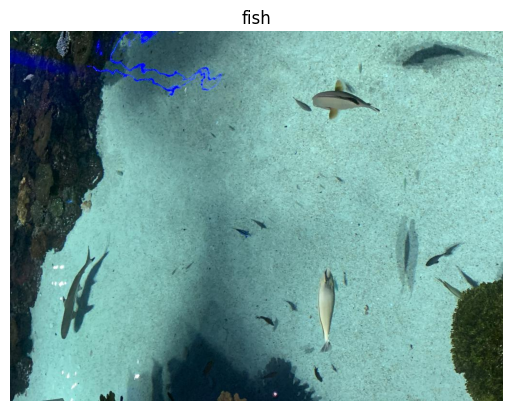

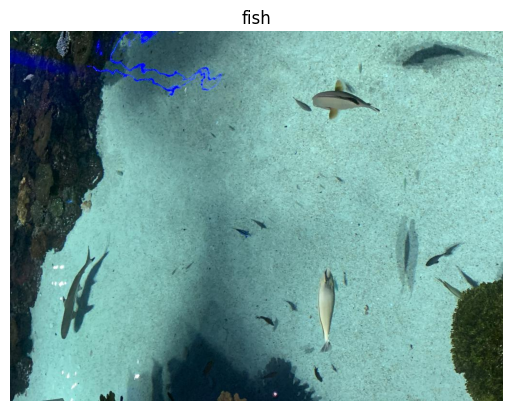

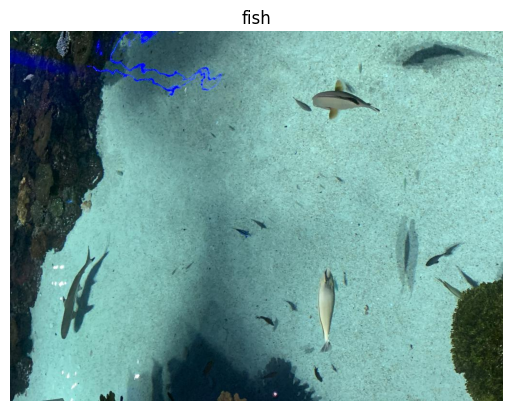

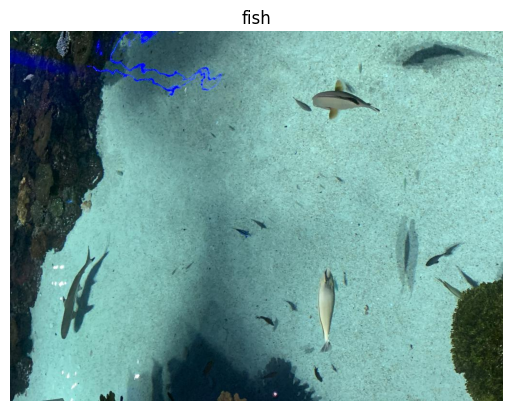

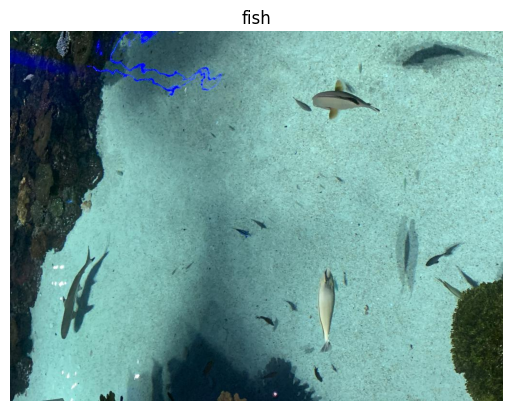

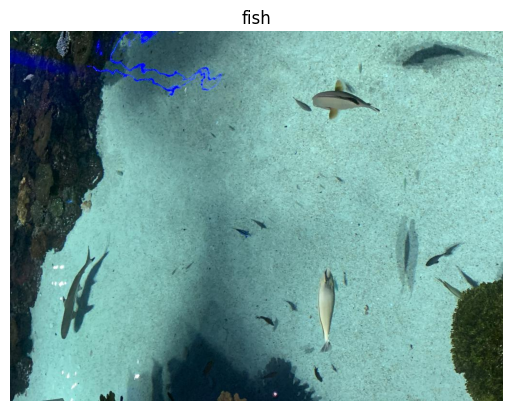

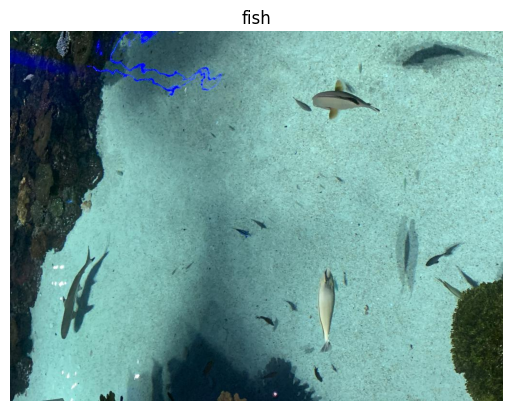

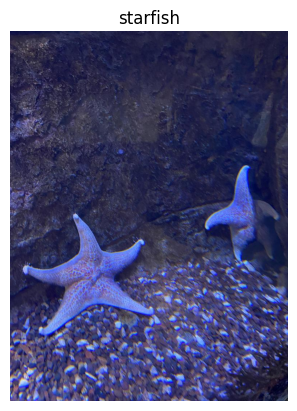

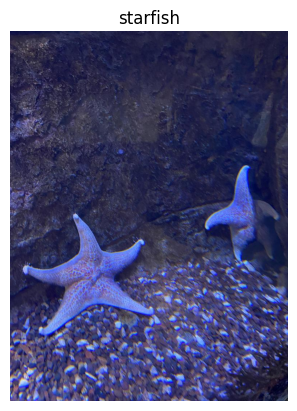

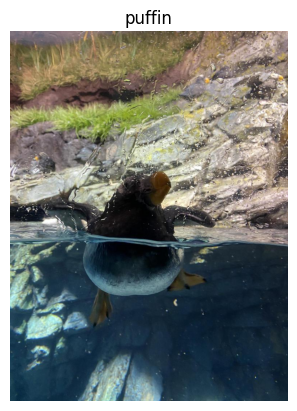

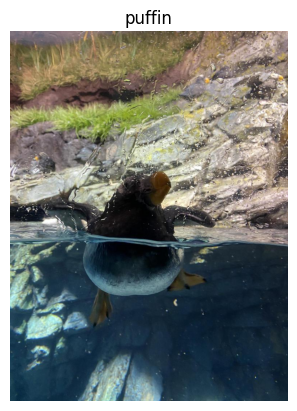

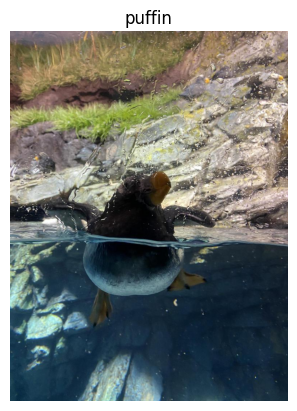

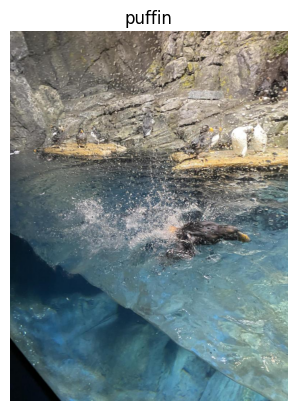

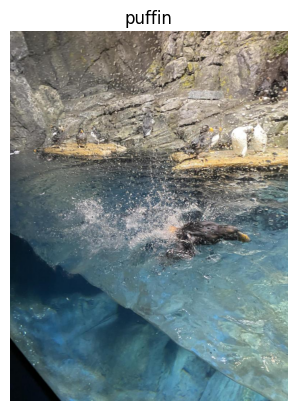

In [ ]:
import matplotlib.pyplot as plt

# Mostrar algunas imágenes del DataFrame
for _, row in df_train.head(20).iterrows():
    plt.imshow(row['imagen'])
    plt.title(row['class'])  # Muestra la etiqueta de la imagen
    plt.axis("off")
    plt.show()


No es que haya imágenes repetidas, es que hay imágenes con varios animales. No hay registros que sean exactamente iguales.

 A lo mejor sería interesante crear un nuevo data frame en el que se utilizaran los recuadros que contienen a animales individuales, de manera que, en vez de tener 5 registros con la misma foto conteniendo 5 animales, se tuvieran 5 registros con las 5 secciones de la foto original correspondiente a cada uno de los animales.

In [3]:
# prompt: quiero transformar df_filtrado de manera que cada registro solo contenga la sección de la imagen delimitada por las coordenadas xmin	ymin	xmax	ymax.

# Crear un nuevo DataFrame para almacenar las imágenes recortadas
df_train_recortado = pd.DataFrame(columns=['filename', 'class', 'xmin', 'ymin', 'xmax', 'ymax', 'imagen_recortada'])

# Iterar sobre las filas del DataFrame filtrado
for index, row in df_train.iterrows():
    imagen = row['imagen']
    if imagen:
        xmin = row['xmin']
        ymin = row['ymin']
        xmax = row['xmax']
        ymax = row['ymax']

        # Recortar la imagen usando las coordenadas
        imagen_recortada = imagen.crop((xmin, ymin, xmax, ymax))

        # Agregar una nueva fila al DataFrame con la imagen recortada
        df_train_recortado = pd.concat([df_train_recortado, pd.DataFrame({'filename': row['filename'],
                                                             'class': row['class'],
                                                             'xmin': xmin,
                                                             'ymin': ymin,
                                                             'xmax': xmax,
                                                             'ymax': ymax,
                                                             'imagen_recortada': [imagen_recortada]})], ignore_index=True)

# Mostrar el nuevo DataFrame con las imágenes recortadas
df_train_recortado.head(20)

# Mostrar algunas imágenes recortadas del DataFrame
for _, row in df_train_recortado.head(20).iterrows():
    plt.imshow(row['imagen_recortada'])
    plt.title(row['class'])  # Muestra la etiqueta de la imagen
    plt.axis("off")
    plt.show()


KeyboardInterrupt: 

No sé si esta manera funcionará mejor, pero no se pierde nada probando. Desde luego, el entrenamiento será más rápido (imagino), porque los tamaños de las fotos son menores. También es verdad que el conjunto de test las imágenes no están recortadas.

Ahora vamos a probar a hacer un reetiquetado de las imágenes, de manera que a cada imagen solo le corresponda una etiqueta aunque haya varios animales en ella. Esa etiqueta se seleccionará para el animal con la puntuación más alta. Dicha puntuación se calculará de la siguiente manera:

`area de cada uno de los animales en una imagen x 2^numero de veces que aparecen`


In [4]:
# Cargar y preprocesar los datos
# Calcular el área de cada animal
df_train['area'] = (df_train['xmax'] - df_train['xmin']) * (df_train['ymax'] - df_train['ymin'])

# Contar la frecuencia de cada clase en cada imagen
class_counts = df_train.groupby(['filename', 'class']).size().reset_index(name='count')
df_train = df_train.merge(class_counts, on=['filename', 'class'])

# Aplicar la fórmula anterior
df_train['score1'] = df_train['area'] * (2 ** df_train['count'])

# Determinar la nueva etiqueta por imagen
class1 = df_train.loc[df_train.groupby('filename')['score1'].idxmax(), ['filename', 'class']]
class1.rename(columns={'class': 'class1'}, inplace=True)
df_train = df_train.merge(class1, on='filename')

In [5]:
# Función para obtener el animal con mayor 'count' en cada grupo de 'filename'
def calculate_score(group):
    # Seleccionar el registro con mayor valor de 'count'
    max_count_row = group.loc[group['count'].idxmax()]
    return pd.Series({
        'score2': max_count_row['area'] * (2 ** max_count_row['count']),
        'class2': max_count_row['class']
    })

# Agrupar por 'filename' y calcular la columna 'score1'
df_train_grouped = df_train.groupby('filename').apply(calculate_score).reset_index()

# Merge de los resultados en el DataFrame original
df_train = df_train.merge(df_train_grouped[['filename', 'score2', 'class2']], on='filename', how='left')


<ipython-input-5-7804ca4b70ec>:6: RuntimeWarning: overflow encountered in scalar multiply
  'score2': max_count_row['area'] * (2 ** max_count_row['count']),
<ipython-input-5-7804ca4b70ec>:6: RuntimeWarning: overflow encountered in scalar multiply
  'score2': max_count_row['area'] * (2 ** max_count_row['count']),
<ipython-input-5-7804ca4b70ec>:6: RuntimeWarning: overflow encountered in scalar multiply
  'score2': max_count_row['area'] * (2 ** max_count_row['count']),
<ipython-input-5-7804ca4b70ec>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_train_grouped = df_train.groupby('filename').apply(calculate_score).reset_index()


In [6]:
# Función para obtener el animal con mayor 'area' en cada grupo de 'filename'
def calculate_area_score(group):
    # Seleccionar el registro con el mayor valor de 'area'
    max_area_row = group.loc[group['area'].idxmax()]
    return pd.Series({
        'score3': max_area_row['area'],
        'class3': max_area_row['class']  # Etiqueta del animal con mayor área
    })

# Agrupar por 'filename' y calcular la columna 'score3'
df_train_grouped_area = df_train.groupby('filename').apply(calculate_area_score).reset_index()

# Merge de los resultados en el DataFrame original
df_train = df_train.merge(df_train_grouped_area[['filename', 'score3', 'class3']], on='filename', how='left')



<ipython-input-6-b6385064ee24>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_train_grouped_area = df_train.groupby('filename').apply(calculate_area_score).reset_index()


In [7]:
df_train['score4'] = df_train['area'] * df_train['count']
class4 = df_train.loc[df_train.groupby('filename')['score4'].idxmax(), ['filename', 'class']]
class4.rename(columns={'class': 'class4'}, inplace=True)
df_train = df_train.merge(class4, on='filename')

In [8]:
df_train

filename  width  height  \
0     IMG_2541_jpeg_jpg.rf.fc997b87790e715d47ce1cc83...    768    1024   
1     IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
2     IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
3     IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
4     IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
...                                                 ...    ...     ...   
3319  IMG_8581_MOV-0_jpg.rf.655f2e11059aeb33350230db...    576    1024   
3320  IMG_8581_MOV-0_jpg.rf.655f2e11059aeb33350230db...    576    1024   
3321  IMG_8581_MOV-0_jpg.rf.655f2e11059aeb33350230db...    576    1024   
3322  IMG_8571_MOV-2_jpg.rf.6620ac28d99d209e56813944...    576    1024   
3323  IMG_8571_MOV-2_jpg.rf.6620ac28d99d209e56813944...    576    1024   

         class  xmin  ymin  xmax  ymax  \
0     starfish   302   410   534   730   
1        shark   106   442   175   640   
2         fish   638   490   678   672   
3         fish   625   107   765   187   
4         fish   818   419   830   499   
...        ...   ...   ...   ...   ...   
3319      fish   248   414   283   438   
3320      fish   314   409   333   417   
3321  stingray   122   343   352   433   
3322      fish   499   245   575   361   
3323     shark     0   493   523   670   

                                                 imagen   area  count  \
0     <PIL.JpegImagePlugin.JpegImageFile image mode=...  74240      1   
1     <PIL.JpegImagePlugin.JpegImageFile image mode=...  13662      1   
2     <PIL.JpegImagePlugin.JpegImageFile image mode=...   7280     11   
3     <PIL.JpegImagePlugin.JpegImageFile image mode=...  11200     11   
4     <PIL.JpegImagePlugin.JpegImageFile image mode=...    960     11   
...                                                 ...    ...    ...   
3319  <PIL.JpegImagePlugin.JpegImageFile image mode=...    840     10   
3320  <PIL.JpegImagePlugin.JpegImageFile image mode=...    152     10   
3321  <PIL.JpegImagePlugin.JpegImageFile image mode=...  20700      1   
3322  <PIL.JpegImagePlugin.JpegImageFile image mode=...   8816      1   
3323  <PIL.JpegImagePlugin.JpegImageFile image mode=...  92571      1   

        score1    class1    score2    class2  score3    class3  score4  \
0       148480  starfish    148480  starfish   74240  starfish   74240   
1        27324      fish  14909440      fish   13662     shark   13662   
2     14909440      fish  14909440      fish   13662     shark   80080   
3     22937600      fish  14909440      fish   13662     shark  123200   
4      1966080      fish  14909440      fish   13662     shark   10560   
...        ...       ...       ...       ...     ...       ...     ...   
3319    860160      fish   5511168      fish   20700  stingray    8400   
3320    155648      fish   5511168      fish   20700  stingray    1520   
3321     41400      fish   5511168      fish   20700  stingray   20700   
3322     17632     shark     17632      fish   92571     shark    8816   
3323    185142     shark     17632      fish   92571     shark   92571   

        class4  
0     starfish  
1         fish  
2         fish  
3         fish  
4         fish  
...        ...  
3319      fish  
3320      fish  
3321      fish  
3322     shark  
3323     shark  

[3324 rows x 19 columns]

¿Ahora tengo que eliminar registros iguales supongo, no?

In [9]:
df_train = df_train.drop_duplicates(subset='filename')
df_train.reset_index(drop=True, inplace=True)
df_train

filename  width  height  \
0    IMG_2541_jpeg_jpg.rf.fc997b87790e715d47ce1cc83...    768    1024   
1    IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
2    IMG_2383_jpeg_jpg.rf.fd376436d382e985e3c0e6936...    768    1024   
3    IMG_3147_jpeg_jpg.rf.fc4622004ff72e58b54663577...    768    1024   
4    IMG_3131_jpeg_jpg.rf.fcf0ccd8dbf187344da242e29...    768    1024   
..                                                 ...    ...     ...   
442  IMG_2540_jpeg_jpg.rf.648b31d1066b616be81fb9447...    768    1024   
443  IMG_2390_jpeg_jpg.rf.64fe0a0c9bb0459e06335b75d...    768    1024   
444  IMG_2480_jpeg_jpg.rf.65112653d4f14fcd3431eed42...    768    1024   
445  IMG_8581_MOV-0_jpg.rf.655f2e11059aeb33350230db...    576    1024   
446  IMG_8571_MOV-2_jpg.rf.6620ac28d99d209e56813944...    576    1024   

         class  xmin  ymin  xmax  ymax  \
0     starfish   302   410   534   730   
1        shark   106   442   175   640   
2     starfish    35   504   394   844   
3       puffin    91   392   571   823   
4       puffin   424   517   667   643   
..         ...   ...   ...   ...   ...   
442   starfish   298   323   560   709   
443   starfish   135   467   647   810   
444  jellyfish   491   185   581   290   
445       fish   476   581   545   659   
446       fish   499   245   575   361   

                                                imagen    area  count  \
0    <PIL.JpegImagePlugin.JpegImageFile image mode=...   74240      1   
1    <PIL.JpegImagePlugin.JpegImageFile image mode=...   13662      1   
2    <PIL.JpegImagePlugin.JpegImageFile image mode=...  122060      2   
3    <PIL.JpegImagePlugin.JpegImageFile image mode=...  206880      3   
4    <PIL.JpegImagePlugin.JpegImageFile image mode=...   30618     12   
..                                                 ...     ...    ...   
442  <PIL.JpegImagePlugin.JpegImageFile image mode=...  101132      1   
443  <PIL.JpegImagePlugin.JpegImageFile image mode=...  175616      1   
444  <PIL.JpegImagePlugin.JpegImageFile image mode=...    9450     15   
445  <PIL.JpegImagePlugin.JpegImageFile image mode=...    5382     10   
446  <PIL.JpegImagePlugin.JpegImageFile image mode=...    8816      1   

        score1     class1     score2     class2  score3     class3  score4  \
0       148480   starfish     148480   starfish   74240   starfish   74240   
1        27324       fish   14909440       fish   13662      shark   13662   
2       488240   starfish     488240   starfish  122060   starfish  244120   
3      1655040     puffin    1655040     puffin  206880     puffin  620640   
4    125411328     puffin  125411328     puffin   30618     puffin  367416   
..         ...        ...        ...        ...     ...        ...     ...   
442     202264   starfish     202264   starfish  101132   starfish  101132   
443     351232   starfish     351232   starfish  175616   starfish  175616   
444  309657600  jellyfish  309657600  jellyfish   10500  jellyfish  141750   
445    5511168       fish    5511168       fish   20700   stingray   53820   
446      17632      shark      17632       fish   92571      shark    8816   

        class4  
0     starfish  
1         fish  
2     starfish  
3       puffin  
4       puffin  
..         ...  
442   starfish  
443   starfish  
444  jellyfish  
445       fish  
446      shark  

[447 rows x 19 columns]

Vamos a descargar también las bases de datos de validación y test:

In [10]:
# Abrir el ZIP sin extraerlo
with zipfile.ZipFile(ruta_zip, 'r') as archivo_zip:
    archivos_en_zip = archivo_zip.namelist()  # Lista de archivos en el ZIP

    # Buscar el archivo annotations.csv dentro de la carpeta valid/
    archivo_annotations = next((f for f in archivos_en_zip if f.startswith("valid/") and "annotations" in f and f.endswith(".csv")), None)

    if archivo_annotations:
        with archivo_zip.open(archivo_annotations) as archivo:
            df_annotations = pd.read_csv(archivo)  # Cargar CSV directamente desde el ZIP
    else:
        raise FileNotFoundError("No se encontró annotations.csv en la carpeta train dentro del ZIP.")

    # Obtener nombres de imágenes en train/
    imagenes_en_valid = {f for f in archivos_en_zip if f.startswith("valid/") and f.endswith((".jpg", ".png"))}

    # Filtrar annotations para incluir solo imágenes que existen en el ZIP
    df_valid = df_annotations[df_annotations['filename'].apply(lambda x: f"valid/{x}" in imagenes_en_valid)].copy()

    # Función para cargar imagen desde el ZIP
    def cargar_imagen(filename):
        ruta_imagen = f"valid/{filename}"
        if ruta_imagen in imagenes_en_valid:
            with archivo_zip.open(ruta_imagen) as imagen_zip:
                return Image.open(io.BytesIO(imagen_zip.read()))  # Cargar imagen con PIL
        return None  # Si no existe, devolver None

    # Crear nueva columna con imágenes
    df_valid['imagen'] = df_valid['filename'].apply(cargar_imagen)

# Mostrar el DataFrame con imágenes
df_valid

filename  width  height  \
0    IMG_2398_jpeg_jpg.rf.000bc0bd92988307264de7019...    768    1024   
1    IMG_2398_jpeg_jpg.rf.000bc0bd92988307264de7019...    768    1024   
2    IMG_2534_jpeg_jpg.rf.009873a3457c50c740a39d733...    768    1024   
3    IMG_2534_jpeg_jpg.rf.009873a3457c50c740a39d733...    768    1024   
4    IMG_2534_jpeg_jpg.rf.009873a3457c50c740a39d733...    768    1024   
..                                                 ...    ...     ...   
904  IMG_2522_jpeg_jpg.rf.fe97228c0f9f15d425a80236b...    768    1024   
905  IMG_2522_jpeg_jpg.rf.fe97228c0f9f15d425a80236b...    768    1024   
906  IMG_2522_jpeg_jpg.rf.fe97228c0f9f15d425a80236b...    768    1024   
907  IMG_2522_jpeg_jpg.rf.fe97228c0f9f15d425a80236b...    768    1024   
908  IMG_2522_jpeg_jpg.rf.fe97228c0f9f15d425a80236b...    768    1024   

        class  xmin  ymin  xmax  ymax  \
0        fish   635    54   767   276   
1        fish   228   479   538   753   
2        fish   126   395   220   576   
3       shark   331   761   767   924   
4    starfish   430   664   602   779   
..        ...   ...   ...   ...   ...   
904    puffin   557   569   596   611   
905    puffin   439   568   490   606   
906    puffin   140   557   203   588   
907    puffin   305   389   357   420   
908    puffin   446   383   475   407   

                                                imagen  
0    <PIL.JpegImagePlugin.JpegImageFile image mode=...  
1    <PIL.JpegImagePlugin.JpegImageFile image mode=...  
2    <PIL.JpegImagePlugin.JpegImageFile image mode=...  
3    <PIL.JpegImagePlugin.JpegImageFile image mode=...  
4    <PIL.JpegImagePlugin.JpegImageFile image mode=...  
..                                                 ...  
904  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
905  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
906  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
907  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
908  <PIL.JpegImagePlugin.JpegImageFile image mode=...  

[909 rows x 9 columns]

Realizamos el mismo proceso de reetiquetado con los datos de validación.

In [11]:
# Cargar y preprocesar los datos en df_valid
# Calcular el área de cada animal
df_valid['area'] = (df_valid['xmax'] - df_valid['xmin']) * (df_valid['ymax'] - df_valid['ymin'])

# Contar la frecuencia de cada clase en cada imagen
class_counts_valid = df_valid.groupby(['filename', 'class']).size().reset_index(name='count')
df_valid = df_valid.merge(class_counts_valid, on=['filename', 'class'])

# Aplicar la fórmula anterior
df_valid['score1'] = df_valid['area'] * (2 ** df_valid['count'])

# Determinar la nueva etiqueta por imagen
class1_valid = df_valid.loc[df_valid.groupby('filename')['score1'].idxmax(), ['filename', 'class']]
class1_valid.rename(columns={'class': 'class1'}, inplace=True)
df_valid = df_valid.merge(class1_valid, on='filename')

# Función para obtener el animal con mayor 'count' en cada grupo de 'filename'
def calculate_score_valid(group):
    # Seleccionar el registro con mayor valor de 'count'
    max_count_row = group.loc[group['count'].idxmax()]
    return pd.Series({
        'score2': max_count_row['area'] * (2 ** max_count_row['count']),
        'class2': max_count_row['class']
    })

# Agrupar por 'filename' y calcular la columna 'score2'
df_valid_grouped = df_valid.groupby('filename').apply(calculate_score_valid).reset_index()

# Merge de los resultados en el DataFrame original
df_valid = df_valid.merge(df_valid_grouped[['filename', 'score2', 'class2']], on='filename', how='left')

# Función para obtener el animal con mayor 'area' en cada grupo de 'filename'
def calculate_area_score_valid(group):
    # Seleccionar el registro con el mayor valor de 'area'
    max_area_row = group.loc[group['area'].idxmax()]
    return pd.Series({
        'score3': max_area_row['area'],
        'class3': max_area_row['class']  # Etiqueta del animal con mayor área
    })

# Agrupar por 'filename' y calcular la columna 'score3'
df_valid_grouped_area = df_valid.groupby('filename').apply(calculate_area_score_valid).reset_index()

# Merge de los resultados en el DataFrame original
df_valid = df_valid.merge(df_valid_grouped_area[['filename', 'score3', 'class3']], on='filename', how='left')

# Calcular score4 y determinar class4
df_valid['score4'] = df_valid['area'] * df_valid['count']
class4_valid = df_valid.loc[df_valid.groupby('filename')['score4'].idxmax(), ['filename', 'class']]
class4_valid.rename(columns={'class': 'class4'}, inplace=True)
df_valid = df_valid.merge(class4_valid, on='filename')


<ipython-input-11-9bc6c73e2c8a>:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_valid_grouped = df_valid.groupby('filename').apply(calculate_score_valid).reset_index()
<ipython-input-11-9bc6c73e2c8a>:42: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_valid_grouped_area = df_valid.groupby('filename').apply(calculate_area_score_valid).reset_index()


In [12]:
df_valid

filename  width  height  \
0    IMG_2398_jpeg_jpg.rf.000bc0bd92988307264de7019...    768    1024   
1    IMG_2398_jpeg_jpg.rf.000bc0bd92988307264de7019...    768    1024   
2    IMG_2534_jpeg_jpg.rf.009873a3457c50c740a39d733...    768    1024   
3    IMG_2534_jpeg_jpg.rf.009873a3457c50c740a39d733...    768    1024   
4    IMG_2534_jpeg_jpg.rf.009873a3457c50c740a39d733...    768    1024   
..                                                 ...    ...     ...   
904  IMG_2522_jpeg_jpg.rf.fe97228c0f9f15d425a80236b...    768    1024   
905  IMG_2522_jpeg_jpg.rf.fe97228c0f9f15d425a80236b...    768    1024   
906  IMG_2522_jpeg_jpg.rf.fe97228c0f9f15d425a80236b...    768    1024   
907  IMG_2522_jpeg_jpg.rf.fe97228c0f9f15d425a80236b...    768    1024   
908  IMG_2522_jpeg_jpg.rf.fe97228c0f9f15d425a80236b...    768    1024   

        class  xmin  ymin  xmax  ymax  \
0        fish   635    54   767   276   
1        fish   228   479   538   753   
2        fish   126   395   220   576   
3       shark   331   761   767   924   
4    starfish   430   664   602   779   
..        ...   ...   ...   ...   ...   
904    puffin   557   569   596   611   
905    puffin   439   568   490   606   
906    puffin   140   557   203   588   
907    puffin   305   389   357   420   
908    puffin   446   383   475   407   

                                                imagen   area  count   score1  \
0    <PIL.JpegImagePlugin.JpegImageFile image mode=...  29304      2   117216   
1    <PIL.JpegImagePlugin.JpegImageFile image mode=...  84940      2   339760   
2    <PIL.JpegImagePlugin.JpegImageFile image mode=...  17014      1    34028   
3    <PIL.JpegImagePlugin.JpegImageFile image mode=...  71068      1   142136   
4    <PIL.JpegImagePlugin.JpegImageFile image mode=...  19780      2    79120   
..                                                 ...    ...    ...      ...   
904  <PIL.JpegImagePlugin.JpegImageFile image mode=...   1638     11  3354624   
905  <PIL.JpegImagePlugin.JpegImageFile image mode=...   1938     11  3969024   
906  <PIL.JpegImagePlugin.JpegImageFile image mode=...   1953     11  3999744   
907  <PIL.JpegImagePlugin.JpegImageFile image mode=...   1612     11  3301376   
908  <PIL.JpegImagePlugin.JpegImageFile image mode=...    696     11  1425408   

     class1    score2    class2  score3  class3  score4  class4  
0      fish    117216      fish   84940    fish   58608    fish  
1      fish    117216      fish   84940    fish  169880    fish  
2     shark     79120  starfish   71068   shark   17014   shark  
3     shark     79120  starfish   71068   shark   71068   shark  
4     shark     79120  starfish   71068   shark   39560   shark  
..      ...       ...       ...     ...     ...     ...     ...  
904  puffin  16293888    puffin    7956  puffin   18018  puffin  
905  puffin  16293888    puffin    7956  puffin   21318  puffin  
906  puffin  16293888    puffin    7956  puffin   21483  puffin  
907  puffin  16293888    puffin    7956  puffin   17732  puffin  
908  puffin  16293888    puffin    7956  puffin    7656  puffin  

[909 rows x 19 columns]

Realizamos el reescalado también en los datos de validación.

Eliminamos duplicados de nuevo

In [13]:
df_valid = df_valid.drop_duplicates(subset='filename')
df_valid.reset_index(drop=True, inplace=True)
df_valid

filename  width  height  \
0    IMG_2398_jpeg_jpg.rf.000bc0bd92988307264de7019...    768    1024   
1    IMG_2534_jpeg_jpg.rf.009873a3457c50c740a39d733...    768    1024   
2    IMG_2464_jpeg_jpg.rf.0121fe35073ca26afded76a7a...    768    1024   
3    IMG_2323_jpeg_jpg.rf.035c5370cfa9efce40a515ce4...    768    1024   
4    IMG_3120_jpeg_jpg.rf.05e302318ebf9502b3467828b...    768    1024   
..                                                 ...    ...     ...   
122  IMG_2637_jpeg_jpg.rf.fb8a2e97a480a468812b0217a...    768    1024   
123  IMG_2381_jpeg_jpg.rf.fc0d53c3b03994926fe019493...    768    1024   
124  IMG_2469_jpeg_jpg.rf.fca5db81cde8b6fe73b8f150e...    768    1024   
125  IMG_8535_MOV-5_jpg.rf.fe45012859267d87836726ec...   1024     576   
126  IMG_2522_jpeg_jpg.rf.fe97228c0f9f15d425a80236b...    768    1024   

         class  xmin  ymin  xmax  ymax  \
0         fish   635    54   767   276   
1         fish   126   395   220   576   
2    jellyfish   457     0   644   168   
3      penguin   219   354   572   486   
4     starfish   138   316   529   680   
..         ...   ...   ...   ...   ...   
122   stingray   200   454   674   830   
123   starfish   200   427   564   783   
124  jellyfish   420     9   610   236   
125     puffin   463   374   560   492   
126     puffin   154   670   222   787   

                                                imagen    area  count  \
0    <PIL.JpegImagePlugin.JpegImageFile image mode=...   29304      2   
1    <PIL.JpegImagePlugin.JpegImageFile image mode=...   17014      1   
2    <PIL.JpegImagePlugin.JpegImageFile image mode=...   31416     22   
3    <PIL.JpegImagePlugin.JpegImageFile image mode=...   46596      3   
4    <PIL.JpegImagePlugin.JpegImageFile image mode=...  142324      1   
..                                                 ...     ...    ...   
122  <PIL.JpegImagePlugin.JpegImageFile image mode=...  178224      2   
123  <PIL.JpegImagePlugin.JpegImageFile image mode=...  129584      1   
124  <PIL.JpegImagePlugin.JpegImageFile image mode=...   43130     20   
125  <PIL.JpegImagePlugin.JpegImageFile image mode=...   11446      5   
126  <PIL.JpegImagePlugin.JpegImageFile image mode=...    7956     11   

           score1     class1        score2     class2  score3     class3  \
0          117216       fish        117216       fish   84940       fish   
1           34028      shark         79120   starfish   71068      shark   
2    131768254464  jellyfish  131768254464  jellyfish   31416  jellyfish   
3          372768    penguin        372768    penguin   46596    penguin   
4          284648   starfish        284648   starfish  142324   starfish   
..            ...        ...           ...        ...     ...        ...   
122        712896   stingray        712896   stingray  178224   stingray   
123        259168   starfish        259168   starfish  129584   starfish   
124   45225082880  jellyfish   45225082880  jellyfish   43130  jellyfish   
125        366272     puffin        366272     puffin   18824     puffin   
126      16293888     puffin      16293888     puffin    7956     puffin   

     score4     class4  
0     58608       fish  
1     17014      shark  
2    691152  jellyfish  
3    139788    penguin  
4    142324   starfish  
..      ...        ...  
122  356448   stingray  
123  129584   starfish  
124  862600  jellyfish  
125   57230     puffin  
126   87516     puffin  

[127 rows x 19 columns]

In [14]:
# Abrir el ZIP sin extraerlo
with zipfile.ZipFile(ruta_zip, 'r') as archivo_zip:
    archivos_en_zip = archivo_zip.namelist()  # Lista de archivos en el ZIP

    # Buscar el archivo annotations.csv dentro de la carpeta valid/
    archivo_annotations = next((f for f in archivos_en_zip if f.startswith("test/") and "annotations" in f and f.endswith(".csv")), None)

    if archivo_annotations:
        with archivo_zip.open(archivo_annotations) as archivo:
            df_annotations = pd.read_csv(archivo)  # Cargar CSV directamente desde el ZIP
    else:
        raise FileNotFoundError("No se encontró annotations.csv en la carpeta test dentro del ZIP.")

    # Obtener nombres de imágenes en train/
    imagenes_en_test = {f for f in archivos_en_zip if f.startswith("test/") and f.endswith((".jpg", ".png"))}

    # Filtrar annotations para incluir solo imágenes que existen en el ZIP
    df_test = df_annotations[df_annotations['filename'].apply(lambda x: f"test/{x}" in imagenes_en_test)].copy()

    # Función para cargar imagen desde el ZIP
    def cargar_imagen(filename):
        ruta_imagen = f"test/{filename}"
        if ruta_imagen in imagenes_en_test:
            with archivo_zip.open(ruta_imagen) as imagen_zip:
                return Image.open(io.BytesIO(imagen_zip.read()))  # Cargar imagen con PIL
        return None  # Si no existe, devolver None

    # Crear nueva columna con imágenes
    df_test['imagen'] = df_test['filename'].apply(cargar_imagen)

# Mostrar el DataFrame con imágenes
df_test

filename  width  height   class  \
0    IMG_2526_jpeg_jpg.rf.003e1d1d41bcd204df731b85c...    768    1024  puffin   
1    IMG_2526_jpeg_jpg.rf.003e1d1d41bcd204df731b85c...    768    1024  puffin   
2    IMG_2526_jpeg_jpg.rf.003e1d1d41bcd204df731b85c...    768    1024  puffin   
3    IMG_2526_jpeg_jpg.rf.003e1d1d41bcd204df731b85c...    768    1024  puffin   
4    IMG_2526_jpeg_jpg.rf.003e1d1d41bcd204df731b85c...    768    1024  puffin   
..                                                 ...    ...     ...     ...   
579  IMG_2450_jpeg_jpg.rf.ff673921373de3bfc275863e3...    768    1024    fish   
580  IMG_2450_jpeg_jpg.rf.ff673921373de3bfc275863e3...    768    1024    fish   
581  IMG_2450_jpeg_jpg.rf.ff673921373de3bfc275863e3...    768    1024    fish   
582  IMG_2450_jpeg_jpg.rf.ff673921373de3bfc275863e3...    768    1024    fish   
583  IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b3...    768    1024  puffin   

     xmin  ymin  xmax  ymax                                             imagen  
0     406   457   497   533  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
1      18   705    82   759  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
2      51   426   116   475  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
3     428   331   504   376  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
4       0   613    21   658  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
..    ...   ...   ...   ...                                                ...  
579     0   253    32   296  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
580   368   284   484   327  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
581   685   257   768   299  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
582   638   312   734   357  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
583   146   482   538   724  <PIL.JpegImagePlugin.JpegImageFile image mode=...  

[584 rows x 9 columns]

In [15]:
df_valid

filename  width  height  \
0    IMG_2398_jpeg_jpg.rf.000bc0bd92988307264de7019...    768    1024   
1    IMG_2534_jpeg_jpg.rf.009873a3457c50c740a39d733...    768    1024   
2    IMG_2464_jpeg_jpg.rf.0121fe35073ca26afded76a7a...    768    1024   
3    IMG_2323_jpeg_jpg.rf.035c5370cfa9efce40a515ce4...    768    1024   
4    IMG_3120_jpeg_jpg.rf.05e302318ebf9502b3467828b...    768    1024   
..                                                 ...    ...     ...   
122  IMG_2637_jpeg_jpg.rf.fb8a2e97a480a468812b0217a...    768    1024   
123  IMG_2381_jpeg_jpg.rf.fc0d53c3b03994926fe019493...    768    1024   
124  IMG_2469_jpeg_jpg.rf.fca5db81cde8b6fe73b8f150e...    768    1024   
125  IMG_8535_MOV-5_jpg.rf.fe45012859267d87836726ec...   1024     576   
126  IMG_2522_jpeg_jpg.rf.fe97228c0f9f15d425a80236b...    768    1024   

         class  xmin  ymin  xmax  ymax  \
0         fish   635    54   767   276   
1         fish   126   395   220   576   
2    jellyfish   457     0   644   168   
3      penguin   219   354   572   486   
4     starfish   138   316   529   680   
..         ...   ...   ...   ...   ...   
122   stingray   200   454   674   830   
123   starfish   200   427   564   783   
124  jellyfish   420     9   610   236   
125     puffin   463   374   560   492   
126     puffin   154   670   222   787   

                                                imagen    area  count  \
0    <PIL.JpegImagePlugin.JpegImageFile image mode=...   29304      2   
1    <PIL.JpegImagePlugin.JpegImageFile image mode=...   17014      1   
2    <PIL.JpegImagePlugin.JpegImageFile image mode=...   31416     22   
3    <PIL.JpegImagePlugin.JpegImageFile image mode=...   46596      3   
4    <PIL.JpegImagePlugin.JpegImageFile image mode=...  142324      1   
..                                                 ...     ...    ...   
122  <PIL.JpegImagePlugin.JpegImageFile image mode=...  178224      2   
123  <PIL.JpegImagePlugin.JpegImageFile image mode=...  129584      1   
124  <PIL.JpegImagePlugin.JpegImageFile image mode=...   43130     20   
125  <PIL.JpegImagePlugin.JpegImageFile image mode=...   11446      5   
126  <PIL.JpegImagePlugin.JpegImageFile image mode=...    7956     11   

           score1     class1        score2     class2  score3     class3  \
0          117216       fish        117216       fish   84940       fish   
1           34028      shark         79120   starfish   71068      shark   
2    131768254464  jellyfish  131768254464  jellyfish   31416  jellyfish   
3          372768    penguin        372768    penguin   46596    penguin   
4          284648   starfish        284648   starfish  142324   starfish   
..            ...        ...           ...        ...     ...        ...   
122        712896   stingray        712896   stingray  178224   stingray   
123        259168   starfish        259168   starfish  129584   starfish   
124   45225082880  jellyfish   45225082880  jellyfish   43130  jellyfish   
125        366272     puffin        366272     puffin   18824     puffin   
126      16293888     puffin      16293888     puffin    7956     puffin   

     score4     class4  
0     58608       fish  
1     17014      shark  
2    691152  jellyfish  
3    139788    penguin  
4    142324   starfish  
..      ...        ...  
122  356448   stingray  
123  129584   starfish  
124  862600  jellyfish  
125   57230     puffin  
126   87516     puffin  

[127 rows x 19 columns]

Vamos a probar un modelo básico con diferentes datos de entrenamiento:

Usando la etiqueta: class1


<ipython-input-27-3d65f22e30a4>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['new_label'] = df_train[class_col]  # Sustituir new_label por la clase actual
<ipython-input-27-3d65f22e30a4>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['new_label'] = df_valid[class_col]  # Sustituir new_label por la clase actual en df_valid
<ipython-input-27-3d65f22e30a4>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 652ms/step - accuracy: 0.2531 - loss: 1.9889 - val_accuracy: 0.3937 - val_loss: 1.8717
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 564ms/step - accuracy: 0.4451 - loss: 1.7920 - val_accuracy: 0.3937 - val_loss: 1.7554
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 938ms/step - accuracy: 0.4434 - loss: 1.6673 - val_accuracy: 0.3228 - val_loss: 1.6986
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 998ms/step - accuracy: 0.4098 - loss: 1.5841 - val_accuracy: 0.3228 - val_loss: 1.6563
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 743ms/step - accuracy: 0.4436 - loss: 1.4936 - val_accuracy: 0.4016 - val_loss: 1.5873
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 983ms/step - accuracy: 0.4955 - loss: 1.4208 - val_accuracy: 0.4724 - val_loss: 1.4737
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 792ms/step - accuracy: 0.5531 - loss: 1.2887 - val_accuracy: 0.4488 - val_loss: 1.4866
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 582ms/step - accuracy: 0.5177 - loss: 1.3543 - val_accuracy: 0.4724 - val_loss

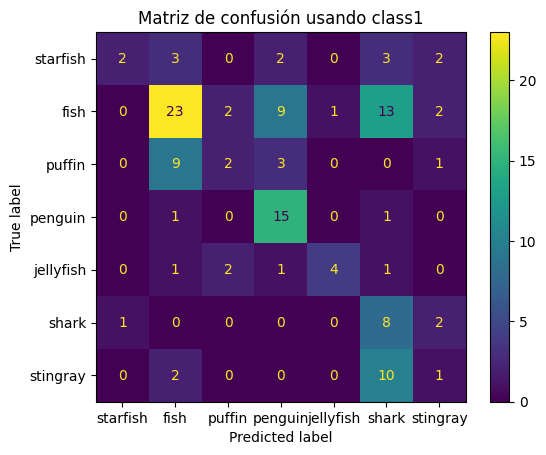

Usando la etiqueta: class2
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.3034 - loss: 2.1688 - val_accuracy: 0.4094 - val_loss: 1.7324
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 708ms/step - accuracy: 0.4800 - loss: 1.6233 - val_accuracy: 0.4094 - val_loss: 1.7107
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 785ms/step - accuracy: 0.4536 - loss: 1.6096 - val_accuracy: 0.3622 - val_loss: 1.7340
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 806ms/step - accuracy: 0.4337 - loss: 1.5956 - val_accuracy: 0.3465 - val_loss: 1.6061
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 899ms/step - accuracy: 0.4335 - loss: 1.4228 - val_accuracy: 0.3543 - val_loss: 1.5639
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 617ms/step - accuracy: 0.4761 - loss: 1.3373 - val_accuracy: 0.4646 - val_loss: 1.4693
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 673ms/step - accuracy: 0.5512 - loss: 1.2561 - val_accuracy: 0.4173 - val_loss: 1.4583
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 869ms/step - accuracy: 0.5584 - loss: 1.2133 - val_acc

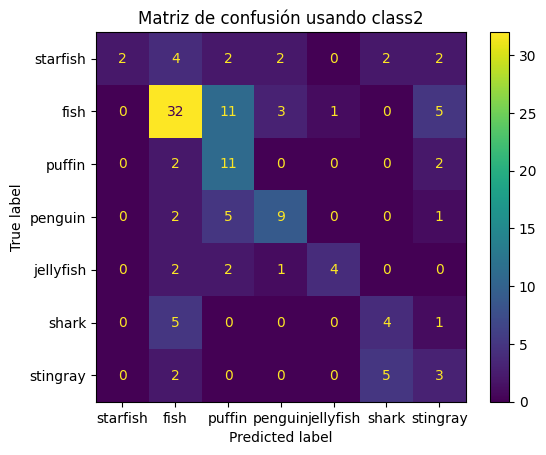

Usando la etiqueta: class3
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 753ms/step - accuracy: 0.2282 - loss: 2.5240 - val_accuracy: 0.3622 - val_loss: 1.8372
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 771ms/step - accuracy: 0.3476 - loss: 1.7982 - val_accuracy: 0.3386 - val_loss: 1.7366
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 608ms/step - accuracy: 0.3657 - loss: 1.6866 - val_accuracy: 0.3622 - val_loss: 1.6184
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.3534 - loss: 1.5896 - val_accuracy: 0.3701 - val_loss: 1.6525
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 857ms/step - accuracy: 0.4227 - loss: 1.5082 - val_accuracy: 0.3543 - val_loss: 1.5824
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4520 - loss: 1.4369 - val_accuracy: 0.4409 - val_loss: 1.4363
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 908ms/step - accuracy: 0.4378 - loss: 1.4310 - val_accuracy: 0.3228 - val_loss: 1.8477
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 671ms/step - accuracy: 0.4305 - loss: 1.4768 - val_accurac

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


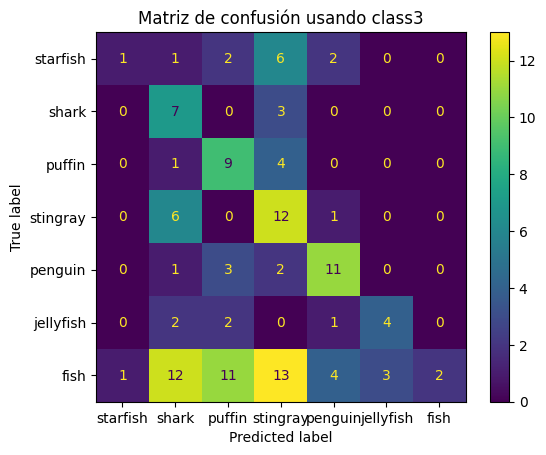

Usando la etiqueta: class4
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 591ms/step - accuracy: 0.2931 - loss: 1.9530 - val_accuracy: 0.3701 - val_loss: 1.7899
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 610ms/step - accuracy: 0.3955 - loss: 1.7434 - val_accuracy: 0.3858 - val_loss: 1.6978
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 635ms/step - accuracy: 0.3693 - loss: 1.6263 - val_accuracy: 0.2913 - val_loss: 1.6344
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 573ms/step - accuracy: 0.4095 - loss: 1.5156 - val_accuracy: 0.4252 - val_loss: 1.4750
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 617ms/step - accuracy: 0.5286 - loss: 1.3570 - val_accuracy: 0.3465 - val_loss: 1.6070
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 554ms/step - accuracy: 0.5032 - loss: 1.3347 - val_accuracy: 0.4331 - val_loss: 1.3992
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 545ms/step - accuracy: 0.5342 - loss: 1.2589 - val_accuracy: 0.4882 - val_loss: 1.4008
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 682ms/step - accuracy: 0.5399 - loss: 1.1951 - val_a

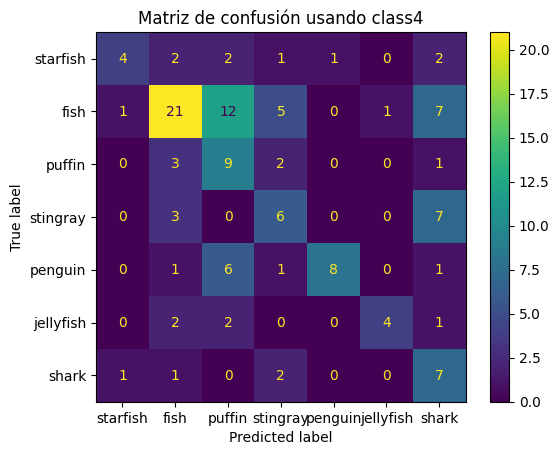

Entrenamiento completado para todas las etiquetas.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Lista de columnas de clase
class_columns = ['class1', 'class2', 'class3', 'class4']

# Iterar sobre cada columna de clase
for class_col in class_columns:
    print(f"Usando la etiqueta: {class_col}")

    # Configuración de etiquetas únicas según la columna actual
    df_train['new_label'] = df_train[class_col]  # Sustituir new_label por la clase actual
    unique_classes = df_train['new_label'].unique()[:7]  # Asegurarse de que hay 7 clases únicas

    # Crear mapeo de clases
    class_mapping = {label: idx for idx, label in enumerate(unique_classes)}

    # Filtrar y mapear etiquetas en df_train
    df_train = df_train[df_train['new_label'].isin(unique_classes)]
    df_train['new_label'] = df_train['new_label'].map(class_mapping)
    num_classes = len(unique_classes)

    # Crear dataset de entrenamiento
    dataset = tf.data.Dataset.from_tensor_slices((
        np.stack(df_train['imagen'].apply(lambda img: np.array(img.resize((64, 64))) / 255.0).values),
        keras.utils.to_categorical(df_train['new_label'], num_classes=num_classes)
    )).batch(64).prefetch(tf.data.AUTOTUNE)

    # Filtrar y mapear etiquetas en df_valid
    df_valid['new_label'] = df_valid[class_col]  # Sustituir new_label por la clase actual en df_valid
    df_valid['new_label'] = df_valid['new_label'].map(class_mapping)
    df_valid = df_valid.dropna(subset=['new_label'])  # Eliminar filas con NaN
    df_valid['new_label'] = df_valid['new_label'].astype(int)

    # Crear dataset de validación
    dataset_valid = tf.data.Dataset.from_tensor_slices((
        np.stack(df_valid['imagen'].apply(lambda img: np.array(img.resize((64, 64))) / 255.0).values),
        keras.utils.to_categorical(df_valid['new_label'], num_classes=num_classes)
    )).batch(64).prefetch(tf.data.AUTOTUNE)

    # Entrenar el modelo y evaluar
    model = keras.Sequential([
        layers.Input(shape=(64, 64, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(dataset, epochs=10, validation_data=dataset_valid)

    # Matriz de confusión
    y_pred = np.argmax(model.predict(np.stack(df_valid['imagen'].apply(lambda img: np.array(img.resize((64, 64))) / 255.0).values)), axis=1)
    y_true = df_valid['new_label']

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(class_mapping.keys()))
    disp.plot()
    plt.title(f"Matriz de confusión usando {class_col}")
    plt.show()

print("Entrenamiento completado para todas las etiquetas.")


Hemos comprobado que con un par de épocas más el modelo funcionaría mejor.



1.   Reetiquetado 1: puntuación1 = área del bounding box que contiene al animal x 2^nº de veces que aparece ese tipo de animal en la imagen. El tipo de animal con mayor puntuación será elegido como nueva etiqueta.
2.   Reetiquetado 2: el tipo de animal que más veces aparezca en la foto sera elegido como nueva etiqueta.
3.   Reetiquetado 3: el tipo de animal que más área tenga en la foto sera elegido como nueva etiqueta.
4.  Reetiquetado 2: puntuación4 = área del bounding box que contiene al animal x nº de veces que aparece ese tipo de animal en la imagen.



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 99.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 105.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.5 MB/s eta 0:00:00
Evaluando configuración: {'kernel_sizes': [(3, 3), (3, 3), (3, 3)], 'pool_sizes': [(2, 2), (2, 2), (2, 2)], 'learning_rate': 0.001}
Usando la etiqueta: class1


<ipython-input-17-c0b91c8c62ca>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['new_label'] = df_train[class_col]
<ipython-input-17-c0b91c8c62ca>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['new_label'] = df_valid[class_col]
<ipython-input-17-c0b91c8c62ca>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 635ms/step - accuracy: 0.2706 - loss: 1.9998 - val_accuracy: 0.3701 - val_loss: 1.8855
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 553ms/step - accuracy: 0.4398 - loss: 1.8037 - val_accuracy: 0.3937 - val_loss: 1.7715
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 520ms/step - accuracy: 0.4275 - loss: 1.7042 - val_accuracy: 0.3937 - val_loss: 1.6776
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 453ms/step - accuracy: 0.4302 - loss: 1.5719 - val_accuracy: 0.3543 - val_loss: 1.6419
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 502ms/step - accuracy: 0.4391 - loss: 1.4869 - val_accuracy: 0.3937 - val_loss: 1.5849
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 516ms/step - accuracy: 0.4457 - loss: 1.4330 - val_accuracy: 0.3465 - val_loss: 1.5639
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 515ms/step - accuracy: 0.4822 - loss: 1.3691 - val_accuracy: 0.4016 - val_loss: 1.5091
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 517ms/step - accuracy: 0.5251 - loss: 1.2683 - val_accuracy: 0.3858 - val_loss:

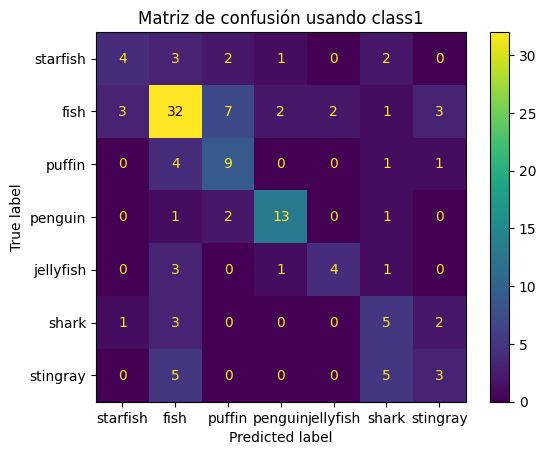

Usando la etiqueta: class2
Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 535ms/step - accuracy: 0.2845 - loss: 1.8910 - val_accuracy: 0.4252 - val_loss: 1.7074
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 485ms/step - accuracy: 0.4706 - loss: 1.5604 - val_accuracy: 0.4488 - val_loss: 1.6366
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 470ms/step - accuracy: 0.4550 - loss: 1.4717 - val_accuracy: 0.3543 - val_loss: 1.6035
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 484ms/step - accuracy: 0.4861 - loss: 1.3763 - val_accuracy: 0.4331 - val_loss: 1.5157
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 468ms/step - accuracy: 0.5314 - loss: 1.2880 - val_accuracy: 0.5276 - val_loss: 1.4816
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 469ms/step - accuracy: 0.5947 - loss: 1.2347 - val_accuracy: 0.4331 - val_loss: 1.4928
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 466ms/step - accuracy: 0.5520 - loss: 1.2671 - val_accuracy: 0.4488 - val_loss: 1.3782
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 451ms/step - accuracy: 0.6162 - loss: 1.0893 - val_a

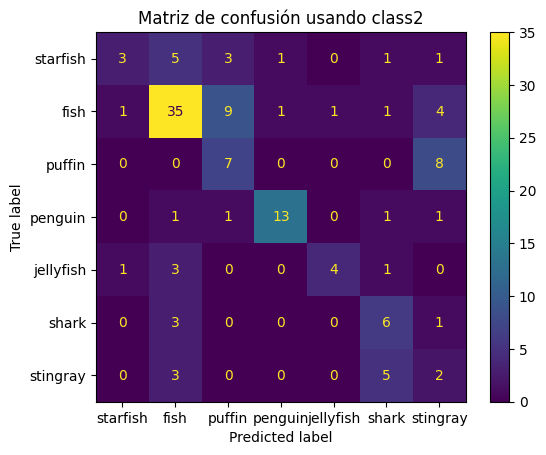

Usando la etiqueta: class3
Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 551ms/step - accuracy: 0.2062 - loss: 2.1748 - val_accuracy: 0.0866 - val_loss: 1.8740
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 467ms/step - accuracy: 0.2993 - loss: 1.7973 - val_accuracy: 0.2677 - val_loss: 1.6998
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 468ms/step - accuracy: 0.3557 - loss: 1.6599 - val_accuracy: 0.2913 - val_loss: 1.6353
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 452ms/step - accuracy: 0.4163 - loss: 1.5180 - val_accuracy: 0.2126 - val_loss: 1.7706
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 468ms/step - accuracy: 0.4371 - loss: 1.4705 - val_accuracy: 0.2756 - val_loss: 1.6189
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 435ms/step - accuracy: 0.4808 - loss: 1.3378 - val_accuracy: 0.3307 - val_loss: 1.6525
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 435ms/step - accuracy: 0.4784 - loss: 1.3234 - val_accuracy: 0.4016 - val_loss: 1.4602
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 486ms/step - accuracy: 0.5614 - loss: 1.1937 - val_a

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


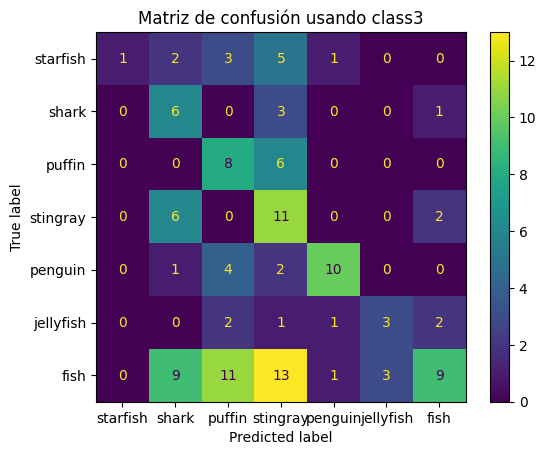

Usando la etiqueta: class4
Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 534ms/step - accuracy: 0.2232 - loss: 2.4196 - val_accuracy: 0.1417 - val_loss: 1.8682
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 455ms/step - accuracy: 0.3040 - loss: 1.7849 - val_accuracy: 0.3858 - val_loss: 1.7014
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 452ms/step - accuracy: 0.3834 - loss: 1.6425 - val_accuracy: 0.3858 - val_loss: 1.6056
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 435ms/step - accuracy: 0.3718 - loss: 1.5687 - val_accuracy: 0.3858 - val_loss: 1.5390
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 483ms/step - accuracy: 0.4535 - loss: 1.4620 - val_accuracy: 0.4409 - val_loss: 1.5272
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 469ms/step - accuracy: 0.4963 - loss: 1.3791 - val_accuracy: 0.2677 - val_loss: 1.6633
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 470ms/step - accuracy: 0.4652 - loss: 1.4441 - val_accuracy: 0.3386 - val_loss: 1.5758
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 452ms/step - accuracy: 0.4844 - loss: 1.3459 - val_a

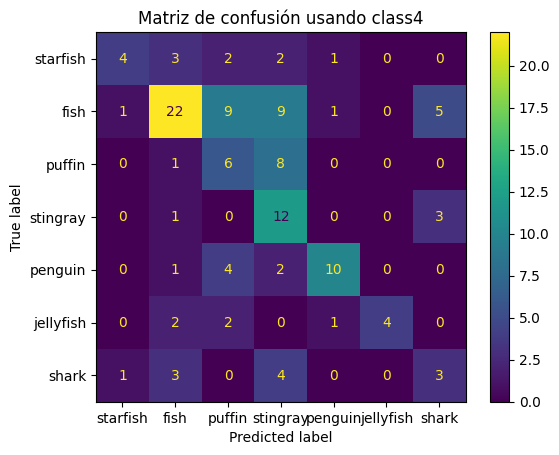

Evaluando configuración: {'kernel_sizes': [(5, 5), (3, 3), (3, 3)], 'pool_sizes': [(3, 3), (2, 2), (2, 2)], 'learning_rate': 0.0005}
Usando la etiqueta: class1
Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 419ms/step - accuracy: 0.3863 - loss: 1.8664 - val_accuracy: 0.3937 - val_loss: 1.7612
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 370ms/step - accuracy: 0.4451 - loss: 1.6877 - val_accuracy: 0.3937 - val_loss: 1.7146
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 352ms/step - accuracy: 0.4451 - loss: 1.6195 - val_accuracy: 0.4488 - val_loss: 1.6228
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 349ms/step - accuracy: 0.4320 - loss: 1.5012 - val_accuracy: 0.4094 - val_loss: 1.5668
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 336ms/step - accuracy: 0.4912 - loss: 1.4280 - val_accuracy: 0.4173 - val_loss: 1.5125
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 318ms/step - accuracy: 0.5293 - loss: 1.3377 - val_accuracy: 0.4016 - val_loss: 1.5074
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 335ms/step - accuracy: 0.5121 - loss: 1.2888 

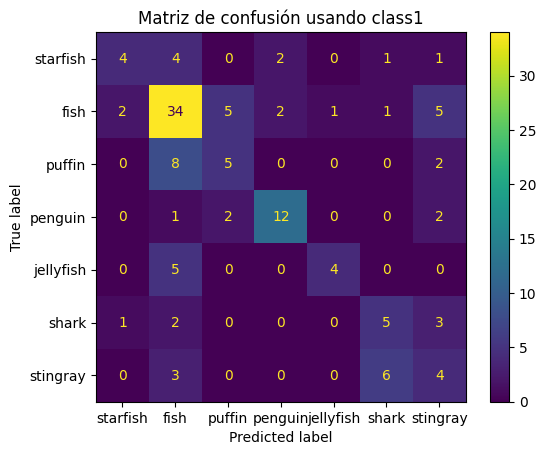

Usando la etiqueta: class2
Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 418ms/step - accuracy: 0.3625 - loss: 1.8509 - val_accuracy: 0.4094 - val_loss: 1.7405
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 367ms/step - accuracy: 0.4800 - loss: 1.6376 - val_accuracy: 0.4094 - val_loss: 1.6965
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 338ms/step - accuracy: 0.4800 - loss: 1.5819 - val_accuracy: 0.4094 - val_loss: 1.6275
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 348ms/step - accuracy: 0.4712 - loss: 1.4959 - val_accuracy: 0.3937 - val_loss: 1.5747
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 353ms/step - accuracy: 0.4680 - loss: 1.4224 - val_accuracy: 0.3858 - val_loss: 1.5462
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 348ms/step - accuracy: 0.4683 - loss: 1.3741 - val_accuracy: 0.4252 - val_loss: 1.4938
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 337ms/step - accuracy: 0.5310 - loss: 1.3122 - val_accuracy: 0.4331 - val_loss: 1.4682
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 319ms/step - accuracy: 0.5310 - loss: 1.2756 - val_a

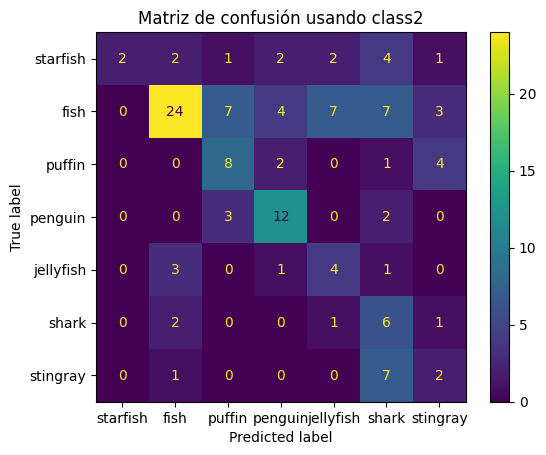

Usando la etiqueta: class3
Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 436ms/step - accuracy: 0.2102 - loss: 1.8749 - val_accuracy: 0.1575 - val_loss: 1.8415
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 396ms/step - accuracy: 0.3080 - loss: 1.7208 - val_accuracy: 0.2756 - val_loss: 1.7709
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 335ms/step - accuracy: 0.3267 - loss: 1.6389 - val_accuracy: 0.2756 - val_loss: 1.6139
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 351ms/step - accuracy: 0.4210 - loss: 1.5648 - val_accuracy: 0.3622 - val_loss: 1.5470
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 365ms/step - accuracy: 0.4606 - loss: 1.4343 - val_accuracy: 0.4094 - val_loss: 1.5557
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 334ms/step - accuracy: 0.4514 - loss: 1.4139 - val_accuracy: 0.4173 - val_loss: 1.3571
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 352ms/step - accuracy: 0.4064 - loss: 1.4224 - val_accuracy: 0.4252 - val_loss: 1.4238
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 335ms/step - accuracy: 0.5167 - loss: 1.2777 - val_a

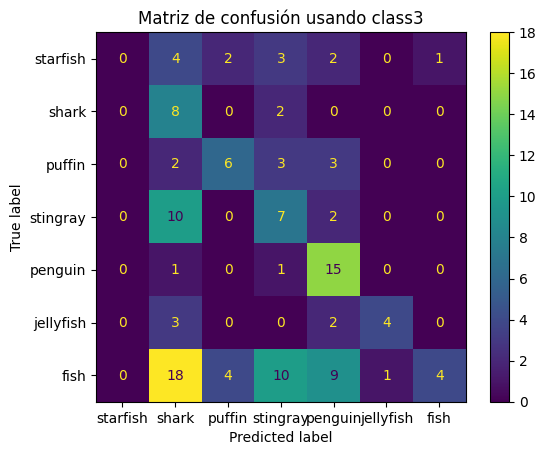

Usando la etiqueta: class4
Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 467ms/step - accuracy: 0.3076 - loss: 1.8365 - val_accuracy: 0.3701 - val_loss: 1.7912
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 401ms/step - accuracy: 0.3931 - loss: 1.7142 - val_accuracy: 0.3858 - val_loss: 1.6672
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 399ms/step - accuracy: 0.3753 - loss: 1.5969 - val_accuracy: 0.3937 - val_loss: 1.5786
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 367ms/step - accuracy: 0.4266 - loss: 1.4851 - val_accuracy: 0.4409 - val_loss: 1.5328
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 367ms/step - accuracy: 0.4813 - loss: 1.4171 - val_accuracy: 0.3465 - val_loss: 1.5525
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 369ms/step - accuracy: 0.4466 - loss: 1.3982 - val_accuracy: 0.3937 - val_loss: 1.4825
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 349ms/step - accuracy: 0.5235 - loss: 1.3155 - val_accuracy: 0.3386 - val_loss: 1.6644
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 367ms/step - accuracy: 0.4490 - loss: 1.3617 - val_a

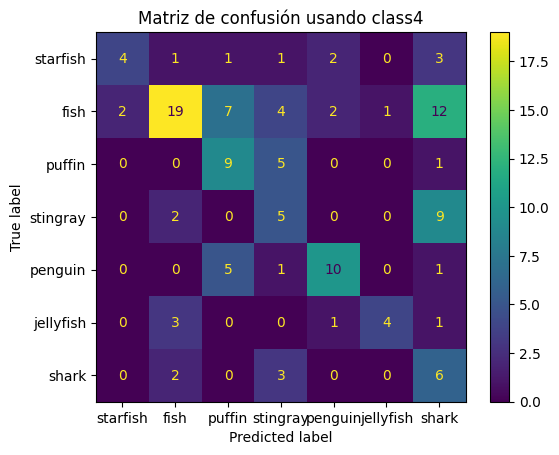

Evaluando configuración: {'kernel_sizes': [(3, 3), (5, 5), (3, 3)], 'pool_sizes': [(2, 2), (3, 3), (2, 2)], 'learning_rate': 0.0001}
Usando la etiqueta: class1
Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 636ms/step - accuracy: 0.3286 - loss: 1.8768 - val_accuracy: 0.3937 - val_loss: 1.7702
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 569ms/step - accuracy: 0.4451 - loss: 1.7068 - val_accuracy: 0.3937 - val_loss: 1.7365
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 535ms/step - accuracy: 0.4451 - loss: 1.6658 - val_accuracy: 0.3937 - val_loss: 1.7095
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 565ms/step - accuracy: 0.4451 - loss: 1.6328 - val_accuracy: 0.3937 - val_loss: 1.6767
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 569ms/step - accuracy: 0.4451 - loss: 1.5953 - val_accuracy: 0.3937 - val_loss: 1.6376
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 553ms/step - accuracy: 0.4451 - loss: 1.5516 - val_accuracy: 0.4173 - val_loss: 1.5971
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 552ms/step - accuracy: 0.4510 - loss: 1.5065 

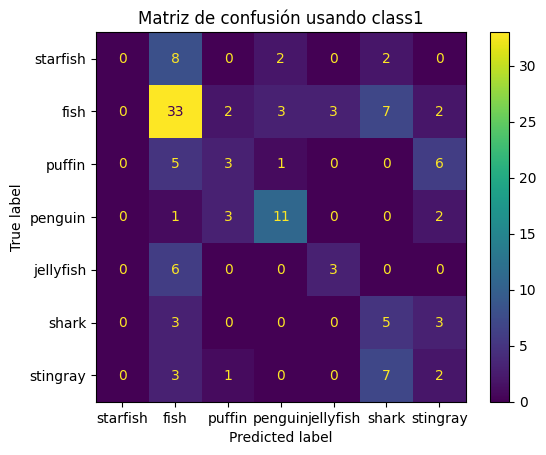

Usando la etiqueta: class2
Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 570ms/step - accuracy: 0.4747 - loss: 1.7683 - val_accuracy: 0.4094 - val_loss: 1.7415
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 519ms/step - accuracy: 0.4800 - loss: 1.6364 - val_accuracy: 0.4094 - val_loss: 1.7042
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 518ms/step - accuracy: 0.4800 - loss: 1.5968 - val_accuracy: 0.4094 - val_loss: 1.6708
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 518ms/step - accuracy: 0.4800 - loss: 1.5595 - val_accuracy: 0.4094 - val_loss: 1.6336
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 518ms/step - accuracy: 0.4800 - loss: 1.5184 - val_accuracy: 0.4252 - val_loss: 1.5947
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 535ms/step - accuracy: 0.4925 - loss: 1.4754 - val_accuracy: 0.4567 - val_loss: 1.5556
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 535ms/step - accuracy: 0.5011 - loss: 1.4315 - val_accuracy: 0.4724 - val_loss: 1.5193
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 518ms/step - accuracy: 0.5043 - loss: 1.3902 - val_a

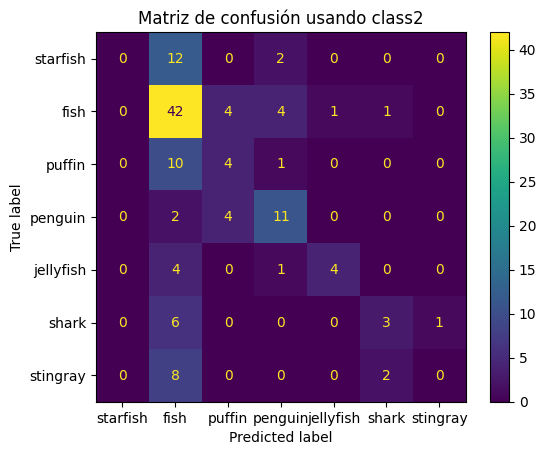

Usando la etiqueta: class3
Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 568ms/step - accuracy: 0.2072 - loss: 1.9124 - val_accuracy: 0.3622 - val_loss: 1.8333
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 568ms/step - accuracy: 0.2958 - loss: 1.8086 - val_accuracy: 0.3622 - val_loss: 1.7961
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 584ms/step - accuracy: 0.3002 - loss: 1.7585 - val_accuracy: 0.3622 - val_loss: 1.7547
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 585ms/step - accuracy: 0.3273 - loss: 1.7005 - val_accuracy: 0.3386 - val_loss: 1.7081
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 603ms/step - accuracy: 0.3886 - loss: 1.6366 - val_accuracy: 0.3228 - val_loss: 1.6621
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 571ms/step - accuracy: 0.3988 - loss: 1.5732 - val_accuracy: 0.3465 - val_loss: 1.6242
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 551ms/step - accuracy: 0.4324 - loss: 1.5194 - val_accuracy: 0.3780 - val_loss: 1.5969
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 551ms/step - accuracy: 0.4563 - loss: 1.4742 - val_a

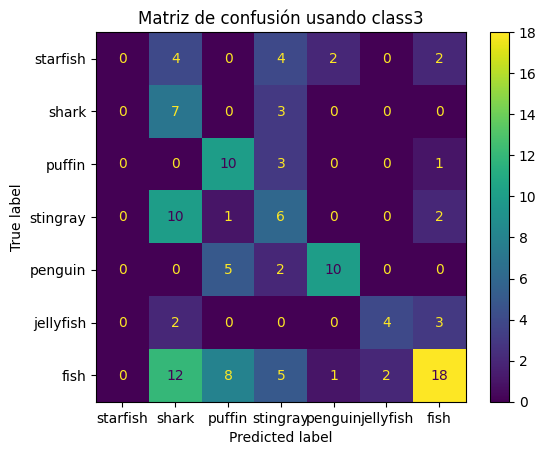

Usando la etiqueta: class4
Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 586ms/step - accuracy: 0.2911 - loss: 1.9058 - val_accuracy: 0.3701 - val_loss: 1.8142
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 553ms/step - accuracy: 0.3931 - loss: 1.7694 - val_accuracy: 0.3701 - val_loss: 1.7717
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 567ms/step - accuracy: 0.3991 - loss: 1.7171 - val_accuracy: 0.3858 - val_loss: 1.7345
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 568ms/step - accuracy: 0.4065 - loss: 1.6706 - val_accuracy: 0.3858 - val_loss: 1.6966
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 535ms/step - accuracy: 0.4071 - loss: 1.6200 - val_accuracy: 0.3622 - val_loss: 1.6559
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 535ms/step - accuracy: 0.4210 - loss: 1.5678 - val_accuracy: 0.3701 - val_loss: 1.6142
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 569ms/step - accuracy: 0.4398 - loss: 1.5166 - val_accuracy: 0.4094 - val_loss: 1.5795
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 601ms/step - accuracy: 0.4466 - loss: 1.4744 - val_a

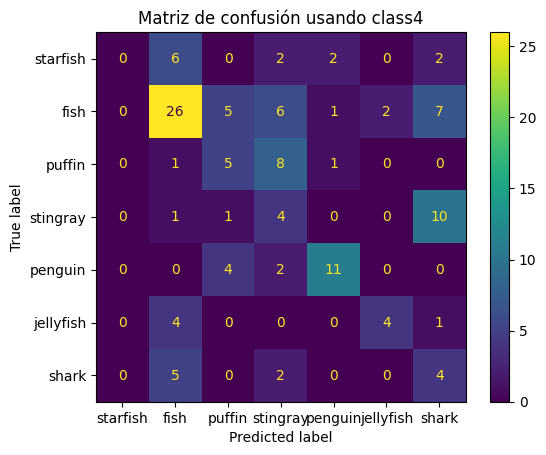

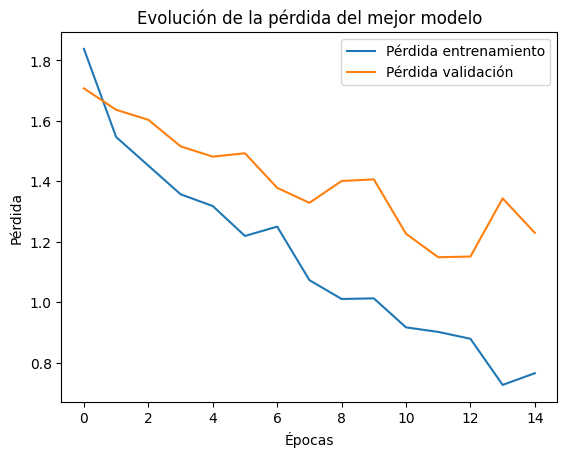

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [17]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Lista de columnas de clase
class_columns = ['class1', 'class2', 'class3', 'class4']

# Definir diferentes configuraciones de la red neuronal
configurations = [
    {'kernel_sizes': [(3, 3), (3, 3), (3, 3)], 'pool_sizes': [(2, 2), (2, 2), (2, 2)], 'learning_rate': 0.001},
    {'kernel_sizes': [(5, 5), (3, 3), (3, 3)], 'pool_sizes': [(3, 3), (2, 2), (2, 2)], 'learning_rate': 0.0005},
    {'kernel_sizes': [(3, 3), (5, 5), (3, 3)], 'pool_sizes': [(2, 2), (3, 3), (2, 2)], 'learning_rate': 0.0001}
]

best_model = None
best_accuracy = 0
best_history = None

for config in configurations:
    print(f"Evaluando configuración: {config}")

    for class_col in class_columns:
        print(f"Usando la etiqueta: {class_col}")

        df_train['new_label'] = df_train[class_col]
        unique_classes = df_train['new_label'].unique()[:7]
        class_mapping = {label: idx for idx, label in enumerate(unique_classes)}

        df_train = df_train[df_train['new_label'].isin(unique_classes)]
        df_train['new_label'] = df_train['new_label'].map(class_mapping)
        num_classes = len(unique_classes)

        dataset = tf.data.Dataset.from_tensor_slices((
            np.stack(df_train['imagen'].apply(lambda img: np.array(img.resize((64, 64))) / 255.0).values),
            keras.utils.to_categorical(df_train['new_label'], num_classes=num_classes)
        )).batch(64).prefetch(tf.data.AUTOTUNE)

        df_valid['new_label'] = df_valid[class_col]
        df_valid['new_label'] = df_valid['new_label'].map(class_mapping)
        df_valid = df_valid.dropna(subset=['new_label'])
        df_valid['new_label'] = df_valid['new_label'].astype(int)

        dataset_valid = tf.data.Dataset.from_tensor_slices((
            np.stack(df_valid['imagen'].apply(lambda img: np.array(img.resize((64, 64))) / 255.0).values),
            keras.utils.to_categorical(df_valid['new_label'], num_classes=num_classes)
        )).batch(64).prefetch(tf.data.AUTOTUNE)

        # Definir la arquitectura de la red
        model = keras.Sequential()
        model.add(layers.Input(shape=(64, 64, 3)))
        for i in range(3):
            model.add(layers.Conv2D(32 * (i + 1), config['kernel_sizes'][i], activation='relu', padding='same'))
            model.add(layers.MaxPooling2D(config['pool_sizes'][i]))
        model.add(layers.Flatten())
        model.add(layers.Dense(128, activation='relu'))
        model.add(layers.Dense(num_classes, activation='softmax'))

        model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=config['learning_rate']),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        history = model.fit(dataset, epochs=15, validation_data=dataset_valid)

        # Evaluar el modelo
        val_accuracy = max(history.history['val_accuracy'])
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_model = model
            best_history = history

        # Matriz de confusión
        y_pred = np.argmax(model.predict(np.stack(df_valid['imagen'].apply(lambda img: np.array(img.resize((64, 64))) / 255.0).values)), axis=1)
        y_true = df_valid['new_label']
        cm = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(class_mapping.keys()))
        disp.plot()
        plt.title(f"Matriz de confusión usando {class_col}")
        plt.show()

# Graficar la pérdida en función de las épocas para el mejor modelo
plt.plot(best_history.history['loss'], label='Pérdida entrenamiento')
plt.plot(best_history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Evolución de la pérdida del mejor modelo')
plt.show()

# Visualizar la arquitectura de la red seleccionada
keras.utils.plot_model(best_model, show_shapes=True, show_layer_names=True)


Como se puede ver, se han probado 3 configuraciones distintas para los tamaños de kernel, tamaños de pooling y tasa de aprendizaje:

*   Configuración 1: `{'kernel_sizes': [(3, 3), (3, 3), (3, 3)], 'pool_sizes': [(2, 2), (2, 2), (2, 2)], 'learning_rate': 0.001}`
*   Configuración 2: `{'kernel_sizes': [(5, 5), (3, 3), (3, 3)], 'pool_sizes': [(3, 3), (2, 2), (2, 2)], 'learning_rate': 0.0005}`
*   Configuración 3: `{'kernel_sizes': [(3, 3), (5, 5), (3, 3)], 'pool_sizes': [(2, 2), (3, 3), (2, 2)], 'learning_rate': 0.0001}`

Se ha probado cada configuración para cada uno de los conjuntos de datos reetiquetados, por lo que tenemos 12 valores de accuracy.



1.   Accuracy de la configuración 1
2.   Elemento de lista



Vamos a probar el modelo entrenado con los datos reetiquetados en los datos de test:

Usando la etiqueta: class1
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 617ms/step - accuracy: 0.3039 - loss: 1.9884 - val_accuracy: 0.3937 - val_loss: 1.8756
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 750ms/step - accuracy: 0.4451 - loss: 1.7907 - val_accuracy: 0.3937 - val_loss: 1.7362
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 675ms/step - accuracy: 0.4442 - loss: 1.6359 - val_accuracy: 0.3228 - val_loss: 1.6598
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 669ms/step - accuracy: 0.4311 - loss: 1.5483 - val_accuracy: 0.3543 - val_loss: 1.5828
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 592ms/step - accuracy: 0.4437 - loss: 1.4569 - val_accuracy: 0.3858 - val_loss: 1.5749
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 802ms/step - accuracy: 0.4798 - loss: 1.4527 - val_accuracy: 0.4724 - val_loss: 1.5141
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 610ms/step - accuracy: 0.4658 - loss: 1.3561 - val_accuracy: 0.4724 - val_loss: 1.4190
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 920ms/step - accuracy: 0.5407 - loss: 1.2713 - val_

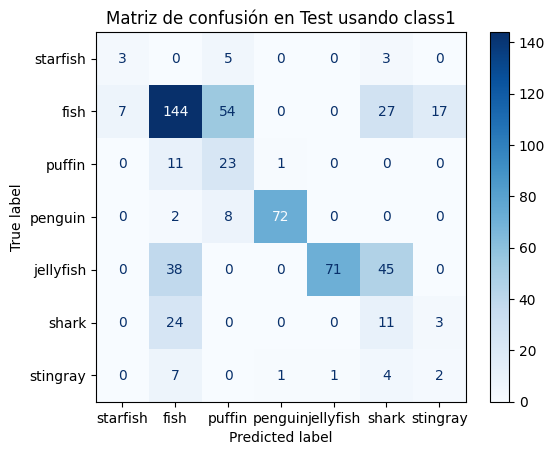

Usando la etiqueta: class2
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 866ms/step - accuracy: 0.3385 - loss: 1.9655 - val_accuracy: 0.4094 - val_loss: 1.7585
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 554ms/step - accuracy: 0.4818 - loss: 1.6754 - val_accuracy: 0.4094 - val_loss: 1.6822
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 579ms/step - accuracy: 0.4641 - loss: 1.5891 - val_accuracy: 0.4094 - val_loss: 1.5809
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 786ms/step - accuracy: 0.4483 - loss: 1.5074 - val_accuracy: 0.4409 - val_loss: 1.5203
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 554ms/step - accuracy: 0.4996 - loss: 1.3870 - val_accuracy: 0.4803 - val_loss: 1.4793
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 623ms/step - accuracy: 0.5347 - loss: 1.3116 - val_accuracy: 0.4882 - val_loss: 1.4447
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 708ms/step - accuracy: 0.5537 - loss: 1.2397 - val_accuracy: 0.5039 - val_loss: 1.3939
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 571ms/step - accuracy: 0.5857 - loss: 1.1661 - val_a

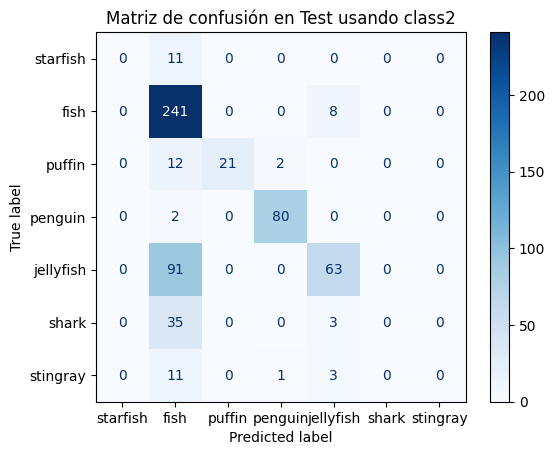

Usando la etiqueta: class3
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.2302 - loss: 2.4344 - val_accuracy: 0.2520 - val_loss: 1.8625
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 891ms/step - accuracy: 0.3137 - loss: 1.8252 - val_accuracy: 0.1102 - val_loss: 1.8433
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 763ms/step - accuracy: 0.3034 - loss: 1.7081 - val_accuracy: 0.3150 - val_loss: 1.6476
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 581ms/step - accuracy: 0.3896 - loss: 1.5934 - val_accuracy: 0.2441 - val_loss: 1.7477
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 579ms/step - accuracy: 0.4047 - loss: 1.5169 - val_accuracy: 0.1890 - val_loss: 1.7707
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 754ms/step - accuracy: 0.4376 - loss: 1.5212 - val_accuracy: 0.3307 - val_loss: 1.5496
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 569ms/step - accuracy: 0.5071 - loss: 1.3272 - val_accuracy: 0.3858 - val_loss: 1.5198
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 561ms/step - accuracy: 0.4661 - loss: 1.3520 - val_acc

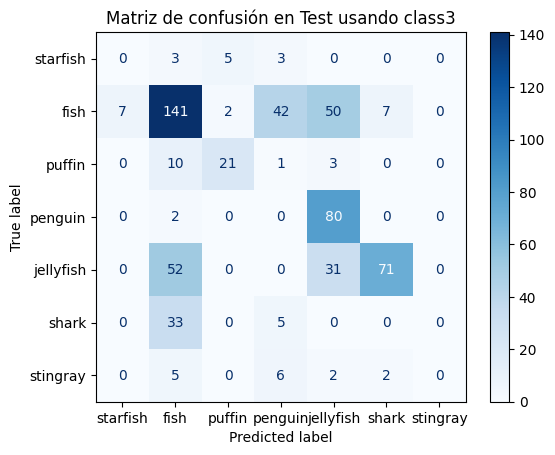

Usando la etiqueta: class4
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 827ms/step - accuracy: 0.3326 - loss: 2.3024 - val_accuracy: 0.3701 - val_loss: 1.7985
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 564ms/step - accuracy: 0.3869 - loss: 1.7313 - val_accuracy: 0.3386 - val_loss: 1.7106
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 790ms/step - accuracy: 0.3661 - loss: 1.6148 - val_accuracy: 0.3386 - val_loss: 1.6504
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 568ms/step - accuracy: 0.4296 - loss: 1.5119 - val_accuracy: 0.3858 - val_loss: 1.5148
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 706ms/step - accuracy: 0.4707 - loss: 1.4111 - val_accuracy: 0.3150 - val_loss: 1.6525
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.4671 - loss: 1.4238 - val_accuracy: 0.3307 - val_loss: 1.4901
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5052 - loss: 1.3340 - val_accuracy: 0.3228 - val_loss: 1.5933
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 838ms/step - accuracy: 0.5078 - loss: 1.3407 - val_accurac

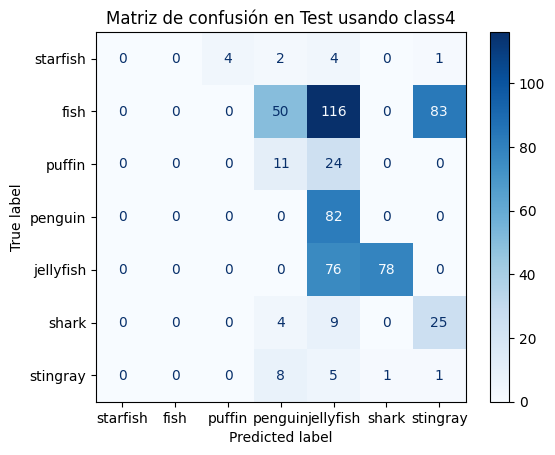

Entrenamiento y evaluación en conjunto de test completados para todas las etiquetas.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Lista de columnas de clase para iterar
class_columns = ['class1', 'class2', 'class3', 'class4']

# Diccionario con el mapeo de clases en conjunto de test
test_class_mapping = {
    'starfish': 0,
    'fish': 1,
    'puffin': 2,
    'penguin': 3,
    'jellyfish': 4,
    'shark': 5,
    'stingray': 6
}

# Preprocesar conjunto de test
df_test['clase_numérica'] = df_test['class'].map(test_class_mapping)
df_test['imagen'] = df_test['imagen'].apply(lambda img: np.array(img.resize((64, 64))) / 255.0)

# Crear dataset de test
dataset_test = tf.data.Dataset.from_tensor_slices((
    np.stack(df_test['imagen'].values),
    keras.utils.to_categorical(df_test['clase_numérica'], num_classes=len(test_class_mapping))
)).batch(64).prefetch(tf.data.AUTOTUNE)

# Iterar sobre cada columna de clase
for class_col in class_columns:
    print(f"Usando la etiqueta: {class_col}")

    # Configuración de etiquetas únicas según la columna actual
    df_train['new_label'] = df_train[class_col]  # Sustituir new_label por la columna actual
    unique_classes = df_train['new_label'].unique()[:7]  # Asegurarse de que hay 7 clases únicas

    # Crear mapeo de clases
    class_mapping = {label: idx for idx, label in enumerate(unique_classes)}

    # Filtrar y mapear etiquetas en df_train
    df_train = df_train[df_train['new_label'].isin(unique_classes)]
    df_train['new_label'] = df_train['new_label'].map(class_mapping)
    num_classes = len(unique_classes)

    # Crear dataset de entrenamiento
    dataset = tf.data.Dataset.from_tensor_slices((
        np.stack(df_train['imagen'].apply(lambda img: np.array(img.resize((64, 64))) / 255.0).values),
        keras.utils.to_categorical(df_train['new_label'], num_classes=num_classes)
    )).batch(64).prefetch(tf.data.AUTOTUNE)

    # Filtrar y mapear etiquetas en df_valid
    df_valid['new_label'] = df_valid[class_col]  # Sustituir new_label por la columna actual en df_valid
    df_valid['new_label'] = df_valid['new_label'].map(class_mapping)
    df_valid = df_valid.dropna(subset=['new_label'])  # Eliminar filas con NaN
    df_valid['new_label'] = df_valid['new_label'].astype(int)

    # Crear dataset de validación
    dataset_valid = tf.data.Dataset.from_tensor_slices((
        np.stack(df_valid['imagen'].apply(lambda img: np.array(img.resize((64, 64))) / 255.0).values),
        keras.utils.to_categorical(df_valid['new_label'], num_classes=num_classes)
    )).batch(64).prefetch(tf.data.AUTOTUNE)

    # Entrenar el modelo
    model = keras.Sequential([
        layers.Input(shape=(64, 64, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(dataset, epochs=10, validation_data=dataset_valid)

    # Evaluación en conjunto de test
    test_loss, test_accuracy = model.evaluate(dataset_test)
    print(f"Pérdida en test usando {class_col}: {test_loss:.4f}")
    print(f"Precisión en test usando {class_col}: {test_accuracy:.4f}")

    # Matriz de confusión para test
    y_pred_test = np.argmax(model.predict(np.stack(df_test['imagen'].values)), axis=1)
    y_true_test = df_test['clase_numérica']

    cm_test = confusion_matrix(y_true_test, y_pred_test)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=list(test_class_mapping.keys()))
    disp_test.plot(cmap=plt.cm.Blues)
    plt.title(f"Matriz de confusión en Test usando {class_col}")
    plt.show()

print("Entrenamiento y evaluación en conjunto de test completados para todas las etiquetas.")


In [ ]:
class_mapping

{'starfish': 0,
 'fish': 1,
 'puffin': 2,
 'penguin': 3,
 'jellyfish': 4,
 'shark': 5,
 'stingray': 6}

Ahora vamos a probar el modelo con los datos originales, sin hacer el reescalado. Como es lógico, tardará mucho más tiempo, porque hay tantos registros como animales únicos, al contrario que con la base de datos reetiquetada, en la que había tantos registros como fotos únicas.

In [ ]:
# Ruta del archivo ZIP
ruta_zip = "/content/practica_1_dataset (1).zip"  # Reemplázala con la ruta real

# Abrir el ZIP sin extraerlo
with zipfile.ZipFile(ruta_zip, 'r') as archivo_zip:
    archivos_en_zip = archivo_zip.namelist()  # Lista de archivos en el ZIP

    # Buscar el archivo annotations.csv dentro de la carpeta train/
    archivo_annotations = next((f for f in archivos_en_zip if f.startswith("train/") and "annotations" in f and f.endswith(".csv")), None)

    if archivo_annotations:
        with archivo_zip.open(archivo_annotations) as archivo:
            df_annotations = pd.read_csv(archivo)  # Cargar CSV directamente desde el ZIP
    else:
        raise FileNotFoundError("No se encontró annotations.csv en la carpeta train dentro del ZIP.")

    # Obtener nombres de imágenes en train/
    imagenes_en_train = {f for f in archivos_en_zip if f.startswith("train/") and f.endswith((".jpg", ".png"))}

    # Filtrar annotations para incluir solo imágenes que existen en el ZIP
    df_train = df_annotations[df_annotations['filename'].apply(lambda x: f"train/{x}" in imagenes_en_train)].copy()

    # Función para cargar imagen desde el ZIP
    def cargar_imagen(filename):
        ruta_imagen = f"train/{filename}"
        if ruta_imagen in imagenes_en_train:
            with archivo_zip.open(ruta_imagen) as imagen_zip:
                return Image.open(io.BytesIO(imagen_zip.read()))  # Cargar imagen con PIL
        return None  # Si no existe, devolver None

    # Crear nueva columna con imágenes
    df_train['imagen'] = df_train['filename'].apply(cargar_imagen)

# Mostrar el DataFrame con imágenes
df_train

filename  width  height  \
0     IMG_2541_jpeg_jpg.rf.fc997b87790e715d47ce1cc83...    768    1024   
1     IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
2     IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
3     IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
4     IMG_8406_jpg.rf.fda4b68f345bda8047e7f15060f70e...   1024     768   
...                                                 ...    ...     ...   
3319  IMG_8581_MOV-0_jpg.rf.655f2e11059aeb33350230db...    576    1024   
3320  IMG_8581_MOV-0_jpg.rf.655f2e11059aeb33350230db...    576    1024   
3321  IMG_8581_MOV-0_jpg.rf.655f2e11059aeb33350230db...    576    1024   
3322  IMG_8571_MOV-2_jpg.rf.6620ac28d99d209e56813944...    576    1024   
3323  IMG_8571_MOV-2_jpg.rf.6620ac28d99d209e56813944...    576    1024   

         class  xmin  ymin  xmax  ymax  \
0     starfish   302   410   534   730   
1        shark   106   442   175   640   
2         fish   638   490   678   672   
3         fish   625   107   765   187   
4         fish   818   419   830   499   
...        ...   ...   ...   ...   ...   
3319      fish   248   414   283   438   
3320      fish   314   409   333   417   
3321  stingray   122   343   352   433   
3322      fish   499   245   575   361   
3323     shark     0   493   523   670   

                                                 imagen  
0     <PIL.JpegImagePlugin.JpegImageFile image mode=...  
1     <PIL.JpegImagePlugin.JpegImageFile image mode=...  
2     <PIL.JpegImagePlugin.JpegImageFile image mode=...  
3     <PIL.JpegImagePlugin.JpegImageFile image mode=...  
4     <PIL.JpegImagePlugin.JpegImageFile image mode=...  
...                                                 ...  
3319  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
3320  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
3321  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
3322  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
3323  <PIL.JpegImagePlugin.JpegImageFile image mode=...  

[3324 rows x 9 columns]

In [ ]:
#ahora  probamos con la etiqueta original(class)
# Ajustar el número de clases únicas a 7
unique_classes = df_train['class'].unique()[:7]  # Asegurar que solo hay 7 clases
class_mapping = {label: idx for idx, label in enumerate(unique_classes)} # esto crea un diccionario con las clases únicas
#las claves son las etiquetas y los valores son los índices correspondientes
df_train = df_train[df_train['class'].isin(unique_classes)]  #indica si el valor de cada etiqueta en new label pertenece al diccionario que acabamos de crear
df_train['class'] = df_train['class'].map(class_mapping) #aquí se reemplazan las etiquetas por los valores numéricos ayudándose del diccionario
num_classes = 7

# Convertir imágenes a arrays y normalizar
dataset = tf.data.Dataset.from_tensor_slices((
    np.stack(df_train['imagen'].apply(lambda img: np.array(img.resize((64, 64))) / 255.0).values),
    keras.utils.to_categorical(df_train['class'], num_classes=num_classes) # one hot encoding
)).batch(64).prefetch(tf.data.AUTOTUNE) #agrupa imágenes en lotes de 64

# Filtrar clases desconocidas en df_valid
df_valid['class'] = df_valid['class'].map(class_mapping)

# Asegurar que no hay valores NaN después del mapeo
df_valid = df_valid.dropna(subset=['class'])  # Elimina filas con NaN en etiquetas

# Convertir a enteros para evitar errores con `to_categorical`
df_valid['class'] = df_valid['class'].astype(int)

# Construir el dataset de validación
dataset_valid = tf.data.Dataset.from_tensor_slices((
    np.stack(df_valid['imagen'].apply(lambda img: np.array(img.resize((64, 64))) / 255.0).values),
    keras.utils.to_categorical(df_valid['class'], num_classes=num_classes)
)).batch(64).prefetch(tf.data.AUTOTUNE)

# Entrenar y evaluar modelos
histories = []
for config in configs:
    model = create_cnn(**config)
    history = model.fit(dataset, epochs=15, validation_data=dataset_valid)
    histories.append((model, history))

# Seleccionar el mejor modelo
best_model, best_history = max(histories, key=lambda x: max(x[1].history['val_accuracy']))

# Graficar la pérdida durante el entrenamiento
plt.plot(best_history.history['loss'], label='Entrenamiento')
plt.plot(best_history.history['val_loss'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Variación de la pérdida durante el entrenamiento')
plt.show()

# Matriz de confusión
y_pred = np.argmax(best_model.predict(np.stack(df_valid['imagen'].apply(lambda img: np.array(img.resize((64, 64))) / 255.0).values)), axis=1)
y_true = df_valid['new_label']
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Resumen de la arquitectura
tf.keras.utils.plot_model(best_model, show_shapes=True, show_layer_names=True)